# Import Dependencies

In [121]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC 

from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from numpy import where

# Read the CSV

In [2]:
# Read the CSV file into a dataframe
df = pd.read_csv(CSV_FILE_URL)
df.shape

(284807, 31)

# Data Cleaning

Checking to see if there are any null values in the dataset. 

In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

It could be seen that there are **no null values** in the dataset.

# Data Exploration

Checking Data distribution w.r.t Target feature

In [4]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


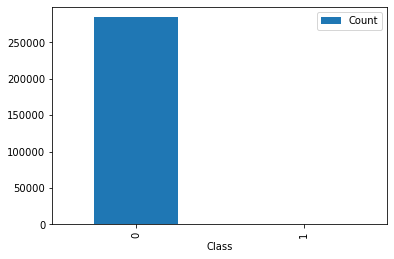

In [5]:
grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

It is evident from the above plot that data is **highly imbalanced**. The dataset has only 492 fraudulent transactions out of a total of 284,807 transactions, which is a mere **0.17%**.

# Defining features

Defining the predictor features and the target feature.

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Selecting predictor features. This will be used as x values.
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [8]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


In [40]:
X_original = selected_features
y_original = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X_original.shape, y_original.shape)

Shape:  (284807, 30) (284807, 1)


In [41]:
X_original_minmax = MinMaxScaler().fit(X_original)

X_original_scaled = X_original_minmax.transform(X_original)

# Near Miss Undersampling

## NearMiss - 1 

In [9]:
# summarize class distribution
counter = Counter(y.flatten())
print(counter)

Counter({0: 284315, 1: 492})


In [10]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)

In [11]:
# transform the dataset
X, y = undersample.fit_resample(X, y)

In [12]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 492, 1: 492})


## Create a Train Test Split

Using `Class` for the y values (target feature)

In [13]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (738, 30) (738,) (246, 30) (246,)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [15]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

In [20]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Train the Models

In [26]:
logisticRegressionModel = LogisticRegression()
randomForestModel = RandomForestClassifier(n_estimators=200)
multinomialNBModel = MultinomialNB()
gaussianNBModel = GaussianNB()
bernoulliNBModel = BernoulliNB()
decisionTreeModel = DecisionTreeClassifier()
gradientBoostingModel = GradientBoostingClassifier(n_estimators=100)
adaBoostModel = AdaBoostClassifier(n_estimators=100)
svmModel = SVC(kernel='linear',probability=True)
denseModel = Sequential()
denseModel.add(Dense(units=200, activation='relu', input_dim=30))
denseModel.add(Dense(units=200, activation='relu'))
denseModel.add(Dense(units=200, activation='relu'))
denseModel.add(Dense(units=2, activation='softmax'))
denseModel.summary()
denseModel.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 200)               6200      
_________________________________________________________________
dense_9 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 402       
Total params: 87,002
Trainable params: 87,002
Non-trainable params: 0
_________________________________________________________________


In [27]:
logisticRegressionModel.fit(X_train_scaled, y_train.flatten())
randomForestModel.fit(X_train_scaled, y_train.flatten())
multinomialNBModel.fit(X_train_scaled, y_train.flatten())
gaussianNBModel.fit(X_train_scaled, y_train.flatten())
bernoulliNBModel.fit(X_train_scaled, y_train.flatten())
decisionTreeModel.fit(X_train_scaled, y_train.flatten())
gradientBoostingModel.fit(X_train_scaled, y_train.flatten())
adaBoostModel.fit(X_train_scaled, y_train.flatten())
svmModel.fit(X_train_scaled, y_train.flatten())
denseModel.fit(X_train_scaled,
               y_train_categorical,
               epochs=100,
               shuffle=True,
               verbose=2)

Train on 738 samples
Epoch 1/100
738/738 - 0s - loss: 0.5391 - accuracy: 0.7493
Epoch 2/100
738/738 - 0s - loss: 0.2611 - accuracy: 0.9038
Epoch 3/100
738/738 - 0s - loss: 0.2169 - accuracy: 0.9241
Epoch 4/100
738/738 - 0s - loss: 0.2653 - accuracy: 0.8862
Epoch 5/100
738/738 - 0s - loss: 0.1925 - accuracy: 0.9350
Epoch 6/100
738/738 - 0s - loss: 0.1866 - accuracy: 0.9350
Epoch 7/100
738/738 - 0s - loss: 0.1570 - accuracy: 0.9431
Epoch 8/100
738/738 - 0s - loss: 0.1801 - accuracy: 0.9322
Epoch 9/100
738/738 - 0s - loss: 0.1481 - accuracy: 0.9485
Epoch 10/100
738/738 - 0s - loss: 0.1526 - accuracy: 0.9404
Epoch 11/100
738/738 - 0s - loss: 0.1540 - accuracy: 0.9431
Epoch 12/100
738/738 - 0s - loss: 0.1391 - accuracy: 0.9458
Epoch 13/100
738/738 - 0s - loss: 0.1705 - accuracy: 0.9431
Epoch 14/100
738/738 - 0s - loss: 0.1310 - accuracy: 0.9553
Epoch 15/100
738/738 - 0s - loss: 0.1188 - accuracy: 0.9580
Epoch 16/100
738/738 - 0s - loss: 0.1486 - accuracy: 0.9390
Epoch 17/100
738/738 - 0s - 

In [28]:
print(f"Logistic Regression: Training Data Score: {logisticRegressionModel.score(X_train_scaled, y_train)}")
print(f"Logistic Regression: Testing Data Score: {logisticRegressionModel.score(X_test_scaled, y_test)}")
print(f"Random Forest: Training Data Score: {randomForestModel.score(X_train_scaled, y_train)}")
print(f"Random Forest: Testing Data Score: {randomForestModel.score(X_test_scaled, y_test)}")
print(f"Multinomial NB: Training Data Score: {multinomialNBModel.score(X_train_scaled, y_train)}")
print(f"Multinomial NB: Testing Data Score: {multinomialNBModel.score(X_test_scaled, y_test)}")
print(f"Gaussian NB: Training Data Score: {gaussianNBModel.score(X_train_scaled, y_train)}")
print(f"Gaussian NB: Testing Data Score: {gaussianNBModel.score(X_test_scaled, y_test)}")
print(f"Bernoulli NB: Training Data Score: {bernoulliNBModel.score(X_train_scaled, y_train)}")
print(f"Bernoulli NB: Testing Data Score: {bernoulliNBModel.score(X_test_scaled, y_test)}")
print(f"Decision Tree: Training Data Score: {decisionTreeModel.score(X_train_scaled, y_train)}")
print(f"Decision Tree: Testing Data Score: {decisionTreeModel.score(X_test_scaled, y_test)}")
print(f"Gradient Boosting: Training Data Score: {gradientBoostingModel.score(X_train_scaled, y_train)}")
print(f"Gradient Boosting: Testing Data Score: {gradientBoostingModel.score(X_test_scaled, y_test)}")
print(f"Ada Boost: Training Data Score: {adaBoostModel.score(X_train_scaled, y_train)}")
print(f"Ada Boost: Testing Data Score: {adaBoostModel.score(X_test_scaled, y_test)}")
print(f"Support Vector Machine: Training Data Score: {svmModel.score(X_train_scaled, y_train)}")
print(f"Support Vector Machine: Testing Data Score: {svmModel.score(X_test_scaled, y_test)}")
model_loss, model_accuracy = denseModel.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Logistic Regression: Training Data Score: 0.943089430894309
Logistic Regression: Testing Data Score: 0.9308943089430894
Random Forest: Training Data Score: 1.0
Random Forest: Testing Data Score: 0.967479674796748
Multinomial NB: Training Data Score: 0.8929539295392954
Multinomial NB: Testing Data Score: 0.9065040650406504
Gaussian NB: Training Data Score: 0.9254742547425474
Gaussian NB: Testing Data Score: 0.9308943089430894
Bernoulli NB: Training Data Score: 0.540650406504065
Bernoulli NB: Testing Data Score: 0.5528455284552846
Decision Tree: Training Data Score: 1.0
Decision Tree: Testing Data Score: 0.9471544715447154
Gradient Boosting: Training Data Score: 1.0
Gradient Boosting: Testing Data Score: 0.967479674796748
Ada Boost: Training Data Score: 1.0
Ada Boost: Testing Data Score: 0.9634146341463414
Support Vector Machine: Training Data Score: 0.9471544715447154
Support Vector Machine: Testing Data Score: 0.9308943089430894
246/246 - 0s - loss: 0.1777 - accuracy: 0.9228
Deep Neura

In [29]:
# Make predictions with the model
logisticRegressionPredictions = logisticRegressionModel.predict(X_test_scaled)
randomForestPredictions = randomForestModel.predict(X_test_scaled)
multinomialNBPredictions = multinomialNBModel.predict(X_test_scaled)
gaussianNBPredictions = gaussianNBModel.predict(X_test_scaled)
bernoulliNBPredictions = bernoulliNBModel.predict(X_test_scaled)
decisionTreePredictions = decisionTreeModel.predict(X_test_scaled)
gradientBoostingPredictions = gradientBoostingModel.predict(X_test_scaled)
adaBoostPredictions = adaBoostModel.predict(X_test_scaled)
svmPredictions = svmModel.predict(X_test_scaled)

In [30]:
logisticRegressionPredictProba = logisticRegressionModel.predict_proba(X_test_scaled)[:,1]
randomForestPredictProba = randomForestModel.predict_proba(X_test_scaled)[:,1]
multinomialNBPredictProba = multinomialNBModel.predict_proba(X_test_scaled)[:,1]
gaussianNBPredictProba = gaussianNBModel.predict_proba(X_test_scaled)[:,1]
bernoulliNBPredictProba = bernoulliNBModel.predict_proba(X_test_scaled)[:,1]
decisionTreePredictProba = decisionTreeModel.predict_proba(X_test_scaled)[:,1]
gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_test_scaled)[:,1]
adaBoostPredictProba = adaBoostModel.predict_proba(X_test_scaled)[:,1]
svmPredictProba = svmModel.predict_proba(X_test_scaled)[:,1]

Logistic Regression Classifier
Accuracy:  0.9308943089430894
Precision:  1.0
Recall:  0.8583333333333333
F1-Score:  0.9237668161434976
AUC score:  0.9291666666666667
                precision    recall  f1-score   support

Non Fraudulent       0.88      1.00      0.94       126
    Fraudulent       1.00      0.86      0.92       120

      accuracy                           0.93       246
     macro avg       0.94      0.93      0.93       246
  weighted avg       0.94      0.93      0.93       246



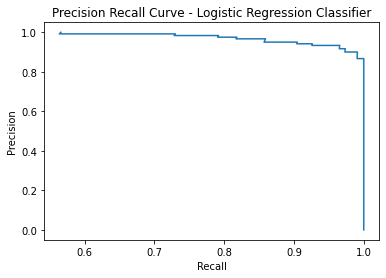

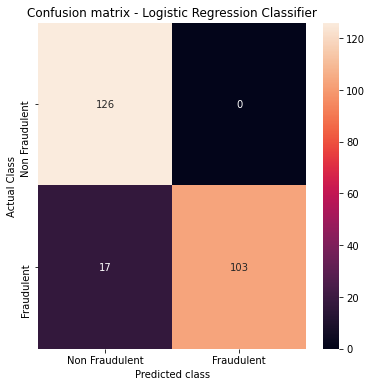

In [31]:
print("Logistic Regression Classifier")
print("==============================")
print("Accuracy: ",accuracy_score(y_test.flatten(), logisticRegressionPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), logisticRegressionPredictions))
print("Recall: ",recall_score(y_test.flatten(), logisticRegressionPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), logisticRegressionPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), logisticRegressionPredictions))
print(classification_report(y_test.flatten(), logisticRegressionPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), logisticRegressionPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Logistic Regression Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), logisticRegressionPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Logistic Regression Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Random Forest Classifier
Accuracy:  0.967479674796748
Precision:  1.0
Recall:  0.9333333333333333
F1-Score:  0.9655172413793104
AUC score:  0.9666666666666667
                precision    recall  f1-score   support

Non Fraudulent       0.94      1.00      0.97       126
    Fraudulent       1.00      0.93      0.97       120

      accuracy                           0.97       246
     macro avg       0.97      0.97      0.97       246
  weighted avg       0.97      0.97      0.97       246



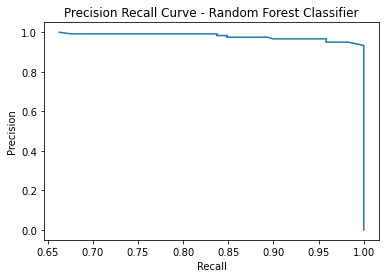

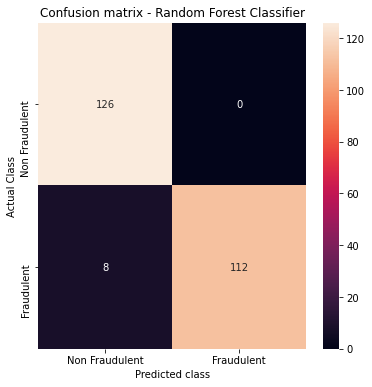

In [32]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomForestPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomForestPredictions))
print("Recall: ",recall_score(y_test.flatten(), randomForestPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomForestPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomForestPredictions))
print(classification_report(y_test.flatten(), randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Multinomial Naive Bayes Classifier
Accuracy:  0.9065040650406504
Precision:  1.0
Recall:  0.8083333333333333
F1-Score:  0.8940092165898618
AUC score:  0.9041666666666667
                precision    recall  f1-score   support

Non Fraudulent       0.85      1.00      0.92       126
    Fraudulent       1.00      0.81      0.89       120

      accuracy                           0.91       246
     macro avg       0.92      0.90      0.91       246
  weighted avg       0.92      0.91      0.91       246



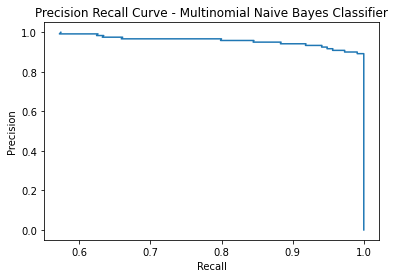

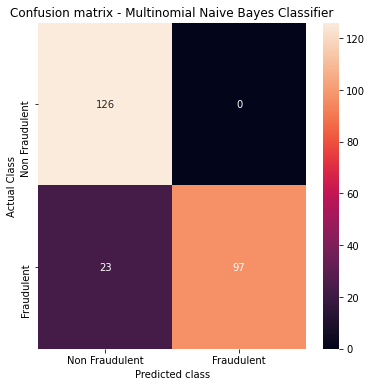

In [33]:
print("Multinomial Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), multinomialNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), multinomialNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), multinomialNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), multinomialNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), multinomialNBPredictions))
print(classification_report(y_test.flatten(), multinomialNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), multinomialNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Multinomial Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), multinomialNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Multinomial Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gaussian Naive Bayes Classifier
Accuracy:  0.9308943089430894
Precision:  0.9724770642201835
Recall:  0.8833333333333333
F1-Score:  0.925764192139738
AUC score:  0.9297619047619047
                precision    recall  f1-score   support

Non Fraudulent       0.90      0.98      0.94       126
    Fraudulent       0.97      0.88      0.93       120

      accuracy                           0.93       246
     macro avg       0.94      0.93      0.93       246
  weighted avg       0.93      0.93      0.93       246



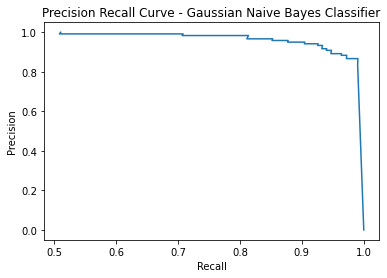

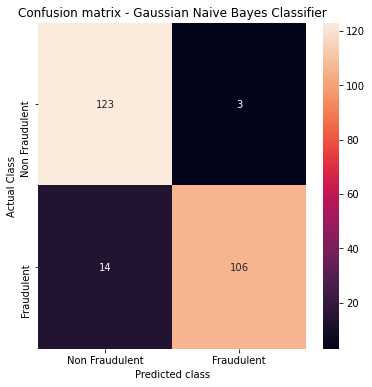

In [34]:
print("Gaussian Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gaussianNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gaussianNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), gaussianNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gaussianNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gaussianNBPredictions))
print(classification_report(y_test.flatten(), gaussianNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gaussianNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gaussian Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), gaussianNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gaussian Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Bernoulli Naive Bayes Classifier
Accuracy:  0.5528455284552846
Precision:  1.0
Recall:  0.08333333333333333
F1-Score:  0.15384615384615385
AUC score:  0.5416666666666666
                precision    recall  f1-score   support

Non Fraudulent       0.53      1.00      0.70       126
    Fraudulent       1.00      0.08      0.15       120

      accuracy                           0.55       246
     macro avg       0.77      0.54      0.42       246
  weighted avg       0.76      0.55      0.43       246



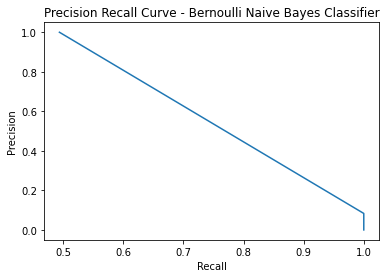

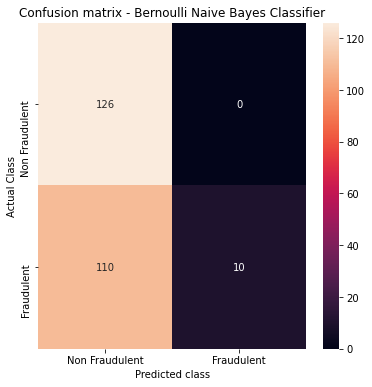

In [35]:
print("Bernoulli Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), bernoulliNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), bernoulliNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), bernoulliNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), bernoulliNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), bernoulliNBPredictions))
print(classification_report(y_test.flatten(), bernoulliNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), bernoulliNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Bernoulli Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), bernoulliNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Bernoulli Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier
Accuracy:  0.9471544715447154
Precision:  0.9495798319327731
Recall:  0.9416666666666667
F1-Score:  0.9456066945606694
AUC score:  0.9470238095238095
                precision    recall  f1-score   support

Non Fraudulent       0.94      0.95      0.95       126
    Fraudulent       0.95      0.94      0.95       120

      accuracy                           0.95       246
     macro avg       0.95      0.95      0.95       246
  weighted avg       0.95      0.95      0.95       246



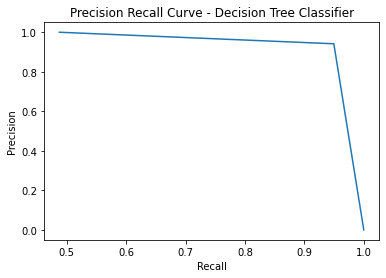

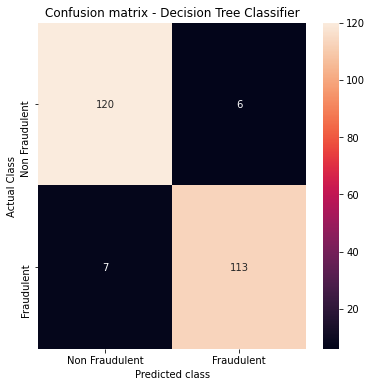

In [36]:
print("Decision Tree Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), decisionTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), decisionTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), decisionTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), decisionTreePredictions))
print(classification_report(y_test.flatten(), decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier
Accuracy:  0.967479674796748
Precision:  0.9912280701754386
Recall:  0.9416666666666667
F1-Score:  0.9658119658119658
AUC score:  0.9668650793650794
                precision    recall  f1-score   support

Non Fraudulent       0.95      0.99      0.97       126
    Fraudulent       0.99      0.94      0.97       120

      accuracy                           0.97       246
     macro avg       0.97      0.97      0.97       246
  weighted avg       0.97      0.97      0.97       246



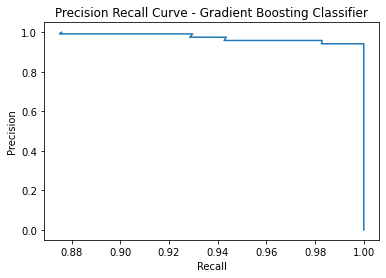

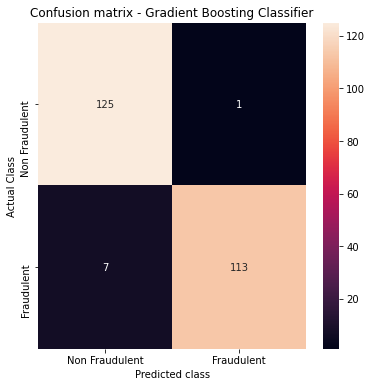

In [37]:
print("Gradient Boosting Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gradientBoostingPredictions))
print("Recall: ",recall_score(y_test.flatten(), gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gradientBoostingPredictions))
print(classification_report(y_test.flatten(), gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boost Classifier
Accuracy:  0.9634146341463414
Precision:  0.9826086956521739
Recall:  0.9416666666666667
F1-Score:  0.9617021276595745
AUC score:  0.9628968253968255
                precision    recall  f1-score   support

Non Fraudulent       0.95      0.98      0.96       126
    Fraudulent       0.98      0.94      0.96       120

      accuracy                           0.96       246
     macro avg       0.96      0.96      0.96       246
  weighted avg       0.96      0.96      0.96       246



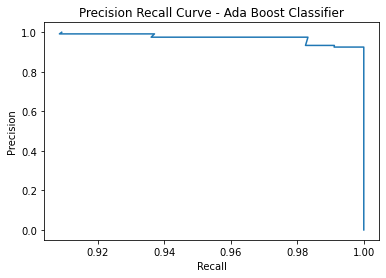

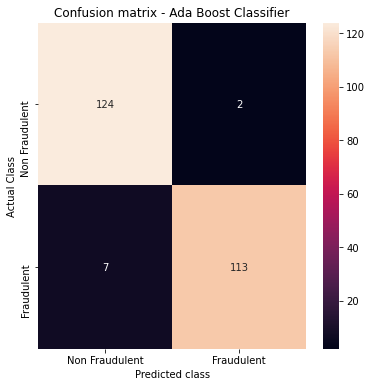

In [38]:
print("Ada Boost Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), adaBoostPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), adaBoostPredictions))
print("Recall: ",recall_score(y_test.flatten(), adaBoostPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), adaBoostPredictions))
print(classification_report(y_test.flatten(), adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Support Vector Machine Classifier
Accuracy:  0.9308943089430894
Precision:  0.9904761904761905
Recall:  0.8666666666666667
F1-Score:  0.9244444444444445
AUC score:  0.9293650793650794
                precision    recall  f1-score   support

Non Fraudulent       0.89      0.99      0.94       126
    Fraudulent       0.99      0.87      0.92       120

      accuracy                           0.93       246
     macro avg       0.94      0.93      0.93       246
  weighted avg       0.94      0.93      0.93       246



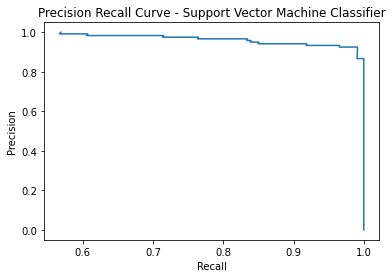

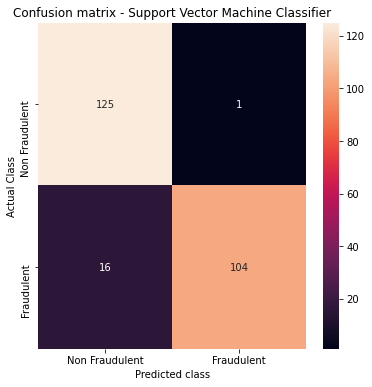

In [39]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), svmPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), svmPredictions))
print("Recall: ",recall_score(y_test.flatten(), svmPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), svmPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), svmPredictions))
print(classification_report(y_test.flatten(), svmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), svmPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), svmPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

## Test the model on original dataset

In [42]:
# Make predictions with the model
original_logisticRegressionPredictions = logisticRegressionModel.predict(X_original_scaled)
original_randomForestPredictions = randomForestModel.predict(X_original_scaled)
original_multinomialNBPredictions = multinomialNBModel.predict(X_original_scaled)
original_gaussianNBPredictions = gaussianNBModel.predict(X_original_scaled)
original_bernoulliNBPredictions = bernoulliNBModel.predict(X_original_scaled)
original_decisionTreePredictions = decisionTreeModel.predict(X_original_scaled)
original_gradientBoostingPredictions = gradientBoostingModel.predict(X_original_scaled)
original_adaBoostPredictions = adaBoostModel.predict(X_original_scaled)
original_svmPredictions = svmModel.predict(X_original_scaled)

In [43]:
original_logisticRegressionPredictProba = logisticRegressionModel.predict_proba(X_original_scaled)[:,1]
original_randomForestPredictProba = randomForestModel.predict_proba(X_original_scaled)[:,1]
original_multinomialNBPredictProba = multinomialNBModel.predict_proba(X_original_scaled)[:,1]
original_gaussianNBPredictProba = gaussianNBModel.predict_proba(X_original_scaled)[:,1]
original_bernoulliNBPredictProba = bernoulliNBModel.predict_proba(X_original_scaled)[:,1]
original_decisionTreePredictProba = decisionTreeModel.predict_proba(X_original_scaled)[:,1]
original_gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_original_scaled)[:,1]
original_adaBoostPredictProba = adaBoostModel.predict_proba(X_original_scaled)[:,1]
original_svmPredictProba = svmModel.predict_proba(X_original_scaled)[:,1]

Logistic Regression Classifier
Accuracy:  0.0017871751747674742
Precision:  0.001727588749604972
Recall:  1.0
F1-Score:  0.003449218667844449
AUC score:  0.5000298964177057
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



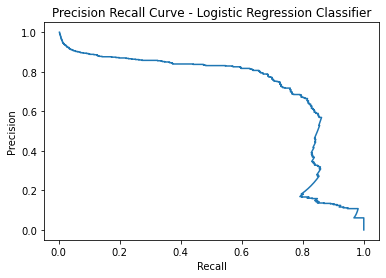

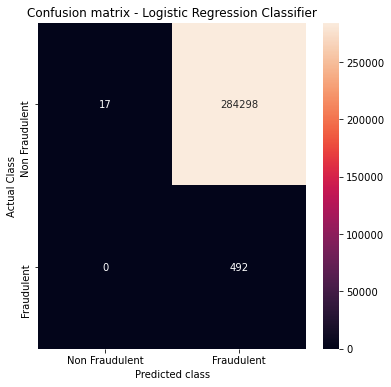

In [44]:
print("Logistic Regression Classifier")
print("==============================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_logisticRegressionPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_logisticRegressionPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_logisticRegressionPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_logisticRegressionPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_logisticRegressionPredictions))
print(classification_report(y_original.flatten(), original_logisticRegressionPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_logisticRegressionPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Logistic Regression Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_logisticRegressionPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Logistic Regression Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Random Forest Classifier
Accuracy:  0.001727485630620034
Precision:  0.001727485630620034
Recall:  1.0
F1-Score:  0.0034490131405998624
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       0.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.00      0.50      0.00    284807
  weighted avg       0.00      0.00      0.00    284807



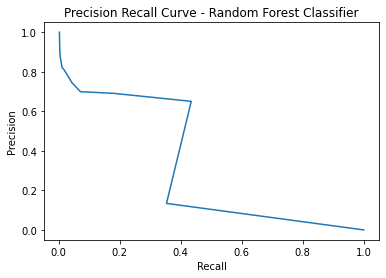

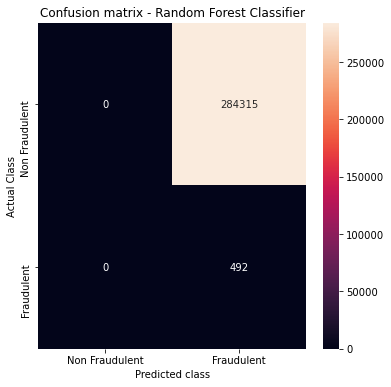

In [45]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_randomForestPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_randomForestPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_randomForestPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_randomForestPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_randomForestPredictions))
print(classification_report(y_original.flatten(), original_randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Multinomial Naive Bayes Classifier
Accuracy:  0.03715849680660939
Precision:  0.0017909404621500023
Recall:  1.0
F1-Score:  0.003575477457050668
AUC score:  0.5177461618275505
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.04      0.07    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.04    284807
     macro avg       0.50      0.52      0.04    284807
  weighted avg       1.00      0.04      0.07    284807



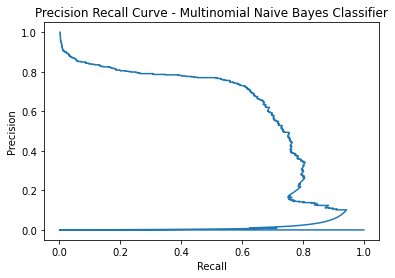

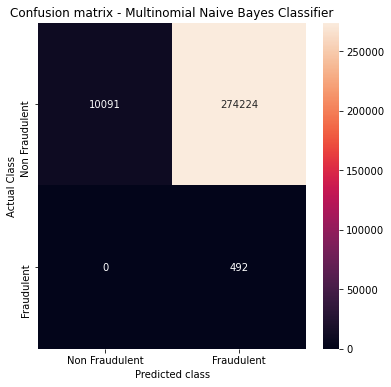

In [46]:
print("Multinomial Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_multinomialNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_multinomialNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_multinomialNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_multinomialNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_multinomialNBPredictions))
print(classification_report(y_original.flatten(), original_multinomialNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_multinomialNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Multinomial Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_multinomialNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Multinomial Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gaussian Naive Bayes Classifier
Accuracy:  0.001727485630620034
Precision:  0.001727485630620034
Recall:  1.0
F1-Score:  0.0034490131405998624
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       0.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.00      0.50      0.00    284807
  weighted avg       0.00      0.00      0.00    284807



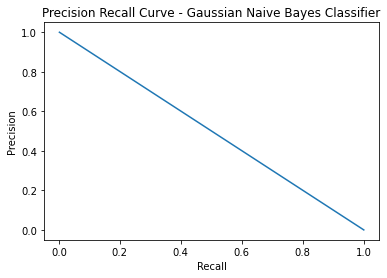

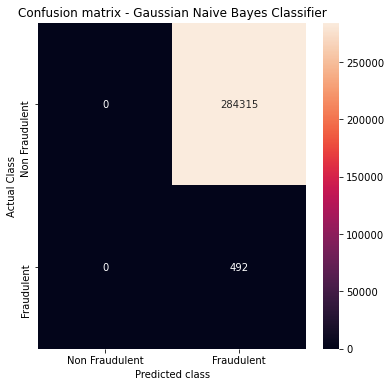

In [47]:
print("Gaussian Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_gaussianNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_gaussianNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_gaussianNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_gaussianNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_gaussianNBPredictions))
print(classification_report(y_original.flatten(), original_gaussianNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_gaussianNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gaussian Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_gaussianNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gaussian Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Bernoulli Naive Bayes Classifier
Accuracy:  0.9920437348801118
Precision:  0.018458197611292075
Recall:  0.06910569105691057
F1-Score:  0.029134532990574127
AUC score:  0.5313732735748122
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.99      1.00    284315
    Fraudulent       0.02      0.07      0.03       492

      accuracy                           0.99    284807
     macro avg       0.51      0.53      0.51    284807
  weighted avg       1.00      0.99      0.99    284807



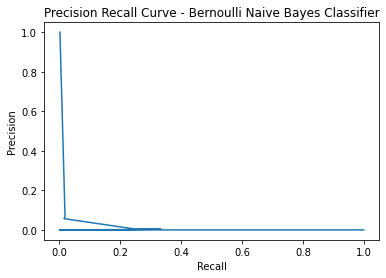

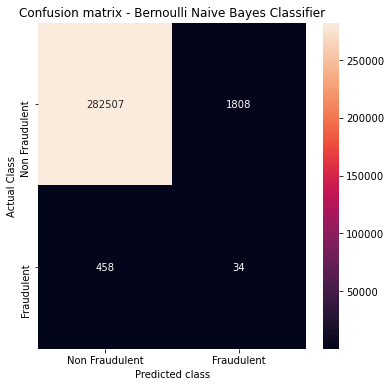

In [48]:
print("Bernoulli Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_bernoulliNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_bernoulliNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_bernoulliNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_bernoulliNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_bernoulliNBPredictions))
print(classification_report(y_original.flatten(), original_bernoulliNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_bernoulliNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Bernoulli Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_bernoulliNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Bernoulli Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier
Accuracy:  0.003061722499798109
Precision:  0.0017297935849972048
Recall:  1.0
F1-Score:  0.003453613132153349
AUC score:  0.500668272866363
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



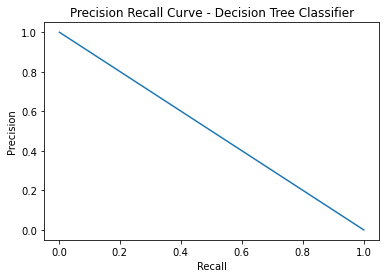

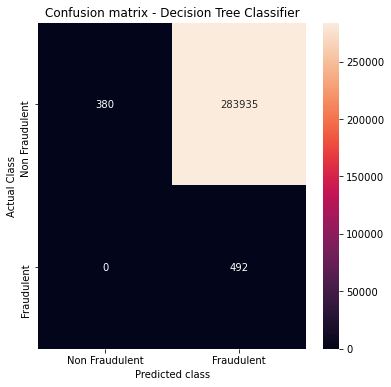

In [49]:
print("Decision Tree Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_decisionTreePredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_decisionTreePredictions))
print("Recall: ",recall_score(y_original.flatten(), original_decisionTreePredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_decisionTreePredictions))
print(classification_report(y_original.flatten(), original_decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier
Accuracy:  0.0019732661065212584
Precision:  0.0017279103172401198
Recall:  1.0
F1-Score:  0.0034498595865076836
AUC score:  0.5001231028964352
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



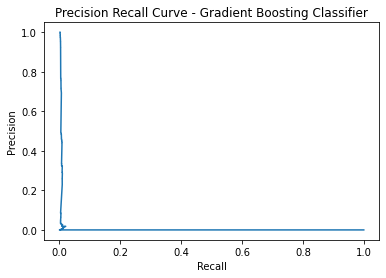

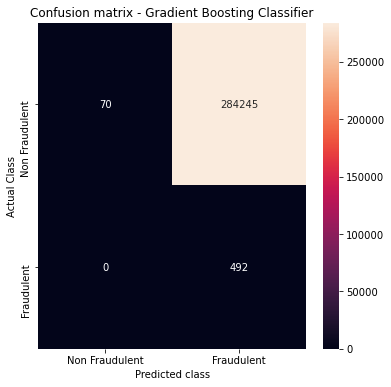

In [50]:
print("Gradient Boosting Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_gradientBoostingPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_gradientBoostingPredictions))
print(classification_report(y_original.flatten(), original_gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boost Classifier
Accuracy:  0.006755451937627937
Precision:  0.0017362152624614028
Recall:  1.0
F1-Score:  0.0034664120873507667
AUC score:  0.5025183335385048
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.01      0.01    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.01    284807
     macro avg       0.50      0.50      0.01    284807
  weighted avg       1.00      0.01      0.01    284807



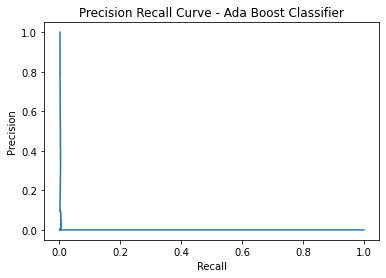

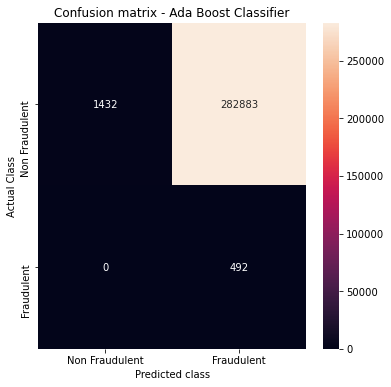

In [51]:
print("Ada Boost Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_adaBoostPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_adaBoostPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_adaBoostPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_adaBoostPredictions))
print(classification_report(y_original.flatten(), original_adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Support Vector Machine Classifier
Accuracy:  0.001867931616849305
Precision:  0.0017277282831226932
Recall:  1.0
F1-Score:  0.0034494967731079473
AUC score:  0.5000703445122487
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



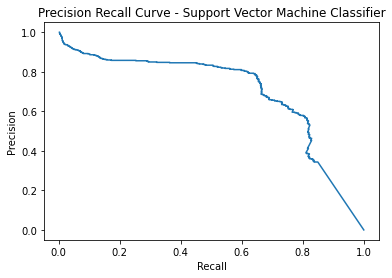

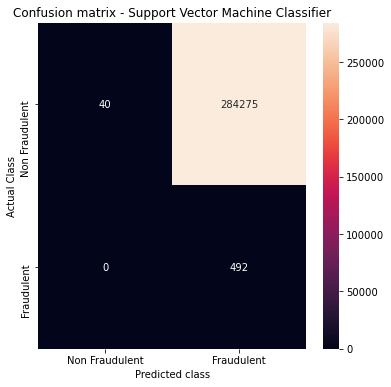

In [52]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_svmPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_svmPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_svmPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_svmPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_svmPredictions))
print(classification_report(y_original.flatten(), original_svmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_svmPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_svmPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

# Near Miss Undersampling

## NearMiss - 2 

In [55]:
# summarize class distribution
counter = Counter(y_original.flatten())
print(counter)

Counter({0: 284315, 1: 492})


In [56]:
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)

In [57]:
# transform the dataset
X, y = undersample.fit_resample(X_original, y_original)

In [58]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 492, 1: 492})


## Create a Train Test Split

Using `Class` for the y values (target feature)

In [59]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (738, 30) (738,) (246, 30) (246,)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [61]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

In [62]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Train the Models

In [63]:
logisticRegressionModel = LogisticRegression()
randomForestModel = RandomForestClassifier(n_estimators=200)
multinomialNBModel = MultinomialNB()
gaussianNBModel = GaussianNB()
bernoulliNBModel = BernoulliNB()
decisionTreeModel = DecisionTreeClassifier()
gradientBoostingModel = GradientBoostingClassifier(n_estimators=100)
adaBoostModel = AdaBoostClassifier(n_estimators=100)
svmModel = SVC(kernel='linear',probability=True)
denseModel = Sequential()
denseModel.add(Dense(units=200, activation='relu', input_dim=30))
denseModel.add(Dense(units=200, activation='relu'))
denseModel.add(Dense(units=200, activation='relu'))
denseModel.add(Dense(units=2, activation='softmax'))
denseModel.summary()
denseModel.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               6200      
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 402       
Total params: 87,002
Trainable params: 87,002
Non-trainable params: 0
_________________________________________________________________


In [64]:
logisticRegressionModel.fit(X_train_scaled, y_train.flatten())
randomForestModel.fit(X_train_scaled, y_train.flatten())
multinomialNBModel.fit(X_train_scaled, y_train.flatten())
gaussianNBModel.fit(X_train_scaled, y_train.flatten())
bernoulliNBModel.fit(X_train_scaled, y_train.flatten())
decisionTreeModel.fit(X_train_scaled, y_train.flatten())
gradientBoostingModel.fit(X_train_scaled, y_train.flatten())
adaBoostModel.fit(X_train_scaled, y_train.flatten())
svmModel.fit(X_train_scaled, y_train.flatten())
denseModel.fit(X_train_scaled,
               y_train_categorical,
               epochs=100,
               shuffle=True,
               verbose=2)

Train on 738 samples
Epoch 1/100
738/738 - 4s - loss: 0.5030 - accuracy: 0.7940
Epoch 2/100
738/738 - 0s - loss: 0.2239 - accuracy: 0.9228
Epoch 3/100
738/738 - 0s - loss: 0.2021 - accuracy: 0.9268
Epoch 4/100
738/738 - 0s - loss: 0.1809 - accuracy: 0.9350
Epoch 5/100
738/738 - 0s - loss: 0.2250 - accuracy: 0.9051
Epoch 6/100
738/738 - 0s - loss: 0.1614 - accuracy: 0.9336
Epoch 7/100
738/738 - 0s - loss: 0.1350 - accuracy: 0.9485
Epoch 8/100
738/738 - 0s - loss: 0.1496 - accuracy: 0.9512
Epoch 9/100
738/738 - 0s - loss: 0.1555 - accuracy: 0.9431
Epoch 10/100
738/738 - 0s - loss: 0.1329 - accuracy: 0.9539
Epoch 11/100
738/738 - 0s - loss: 0.1287 - accuracy: 0.9526
Epoch 12/100
738/738 - 0s - loss: 0.1193 - accuracy: 0.9553
Epoch 13/100
738/738 - 0s - loss: 0.1143 - accuracy: 0.9566
Epoch 14/100
738/738 - 0s - loss: 0.1089 - accuracy: 0.9634
Epoch 15/100
738/738 - 0s - loss: 0.1373 - accuracy: 0.9458
Epoch 16/100
738/738 - 0s - loss: 0.1194 - accuracy: 0.9607
Epoch 17/100
738/738 - 0s - 

In [65]:
print(f"Logistic Regression: Training Data Score: {logisticRegressionModel.score(X_train_scaled, y_train)}")
print(f"Logistic Regression: Testing Data Score: {logisticRegressionModel.score(X_test_scaled, y_test)}")
print(f"Random Forest: Training Data Score: {randomForestModel.score(X_train_scaled, y_train)}")
print(f"Random Forest: Testing Data Score: {randomForestModel.score(X_test_scaled, y_test)}")
print(f"Multinomial NB: Training Data Score: {multinomialNBModel.score(X_train_scaled, y_train)}")
print(f"Multinomial NB: Testing Data Score: {multinomialNBModel.score(X_test_scaled, y_test)}")
print(f"Gaussian NB: Training Data Score: {gaussianNBModel.score(X_train_scaled, y_train)}")
print(f"Gaussian NB: Testing Data Score: {gaussianNBModel.score(X_test_scaled, y_test)}")
print(f"Bernoulli NB: Training Data Score: {bernoulliNBModel.score(X_train_scaled, y_train)}")
print(f"Bernoulli NB: Testing Data Score: {bernoulliNBModel.score(X_test_scaled, y_test)}")
print(f"Decision Tree: Training Data Score: {decisionTreeModel.score(X_train_scaled, y_train)}")
print(f"Decision Tree: Testing Data Score: {decisionTreeModel.score(X_test_scaled, y_test)}")
print(f"Gradient Boosting: Training Data Score: {gradientBoostingModel.score(X_train_scaled, y_train)}")
print(f"Gradient Boosting: Testing Data Score: {gradientBoostingModel.score(X_test_scaled, y_test)}")
print(f"Ada Boost: Training Data Score: {adaBoostModel.score(X_train_scaled, y_train)}")
print(f"Ada Boost: Testing Data Score: {adaBoostModel.score(X_test_scaled, y_test)}")
print(f"Support Vector Machine: Training Data Score: {svmModel.score(X_train_scaled, y_train)}")
print(f"Support Vector Machine: Testing Data Score: {svmModel.score(X_test_scaled, y_test)}")
model_loss, model_accuracy = denseModel.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Logistic Regression: Training Data Score: 0.9349593495934959
Logistic Regression: Testing Data Score: 0.9146341463414634
Random Forest: Training Data Score: 1.0
Random Forest: Testing Data Score: 0.991869918699187
Multinomial NB: Training Data Score: 0.8902439024390244
Multinomial NB: Testing Data Score: 0.8699186991869918
Gaussian NB: Training Data Score: 0.9796747967479674
Gaussian NB: Testing Data Score: 0.983739837398374
Bernoulli NB: Training Data Score: 0.5447154471544715
Bernoulli NB: Testing Data Score: 0.540650406504065
Decision Tree: Training Data Score: 1.0
Decision Tree: Testing Data Score: 0.9959349593495935
Gradient Boosting: Training Data Score: 1.0
Gradient Boosting: Testing Data Score: 0.991869918699187
Ada Boost: Training Data Score: 1.0
Ada Boost: Testing Data Score: 0.9959349593495935
Support Vector Machine: Training Data Score: 0.943089430894309
Support Vector Machine: Testing Data Score: 0.9105691056910569
246/246 - 0s - loss: 0.0524 - accuracy: 0.9878
Deep Neural

In [66]:
# Make predictions with the model
logisticRegressionPredictions = logisticRegressionModel.predict(X_test_scaled)
randomForestPredictions = randomForestModel.predict(X_test_scaled)
multinomialNBPredictions = multinomialNBModel.predict(X_test_scaled)
gaussianNBPredictions = gaussianNBModel.predict(X_test_scaled)
bernoulliNBPredictions = bernoulliNBModel.predict(X_test_scaled)
decisionTreePredictions = decisionTreeModel.predict(X_test_scaled)
gradientBoostingPredictions = gradientBoostingModel.predict(X_test_scaled)
adaBoostPredictions = adaBoostModel.predict(X_test_scaled)
svmPredictions = svmModel.predict(X_test_scaled)

In [67]:
logisticRegressionPredictProba = logisticRegressionModel.predict_proba(X_test_scaled)[:,1]
randomForestPredictProba = randomForestModel.predict_proba(X_test_scaled)[:,1]
multinomialNBPredictProba = multinomialNBModel.predict_proba(X_test_scaled)[:,1]
gaussianNBPredictProba = gaussianNBModel.predict_proba(X_test_scaled)[:,1]
bernoulliNBPredictProba = bernoulliNBModel.predict_proba(X_test_scaled)[:,1]
decisionTreePredictProba = decisionTreeModel.predict_proba(X_test_scaled)[:,1]
gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_test_scaled)[:,1]
adaBoostPredictProba = adaBoostModel.predict_proba(X_test_scaled)[:,1]
svmPredictProba = svmModel.predict_proba(X_test_scaled)[:,1]

Logistic Regression Classifier
Accuracy:  0.9146341463414634
Precision:  0.9805825242718447
Recall:  0.8416666666666667
F1-Score:  0.905829596412556
AUC score:  0.9128968253968256
                precision    recall  f1-score   support

Non Fraudulent       0.87      0.98      0.92       126
    Fraudulent       0.98      0.84      0.91       120

      accuracy                           0.91       246
     macro avg       0.92      0.91      0.91       246
  weighted avg       0.92      0.91      0.91       246



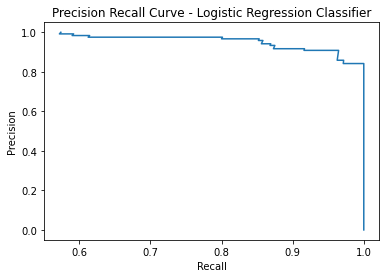

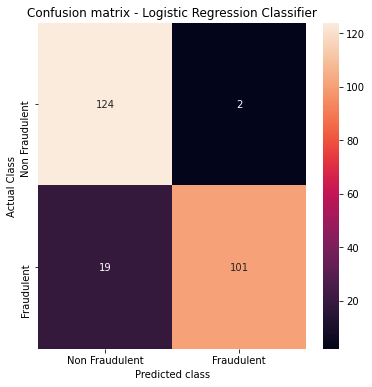

In [68]:
print("Logistic Regression Classifier")
print("==============================")
print("Accuracy: ",accuracy_score(y_test.flatten(), logisticRegressionPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), logisticRegressionPredictions))
print("Recall: ",recall_score(y_test.flatten(), logisticRegressionPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), logisticRegressionPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), logisticRegressionPredictions))
print(classification_report(y_test.flatten(), logisticRegressionPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), logisticRegressionPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Logistic Regression Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), logisticRegressionPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Logistic Regression Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Random Forest Classifier
Accuracy:  0.991869918699187
Precision:  1.0
Recall:  0.9833333333333333
F1-Score:  0.9915966386554621
AUC score:  0.9916666666666667
                precision    recall  f1-score   support

Non Fraudulent       0.98      1.00      0.99       126
    Fraudulent       1.00      0.98      0.99       120

      accuracy                           0.99       246
     macro avg       0.99      0.99      0.99       246
  weighted avg       0.99      0.99      0.99       246



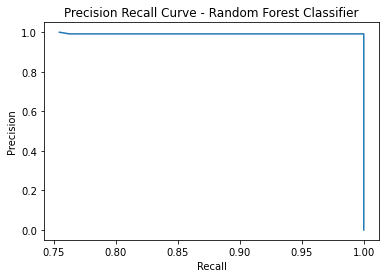

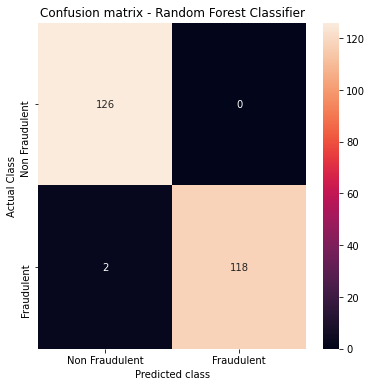

In [69]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomForestPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomForestPredictions))
print("Recall: ",recall_score(y_test.flatten(), randomForestPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomForestPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomForestPredictions))
print(classification_report(y_test.flatten(), randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Multinomial Naive Bayes Classifier
Accuracy:  0.8699186991869918
Precision:  1.0
Recall:  0.7333333333333333
F1-Score:  0.846153846153846
AUC score:  0.8666666666666667
                precision    recall  f1-score   support

Non Fraudulent       0.80      1.00      0.89       126
    Fraudulent       1.00      0.73      0.85       120

      accuracy                           0.87       246
     macro avg       0.90      0.87      0.87       246
  weighted avg       0.90      0.87      0.87       246



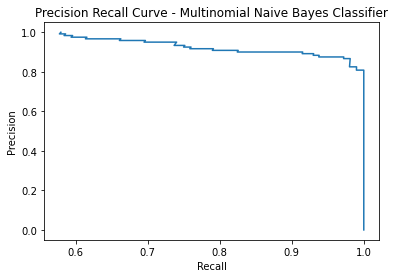

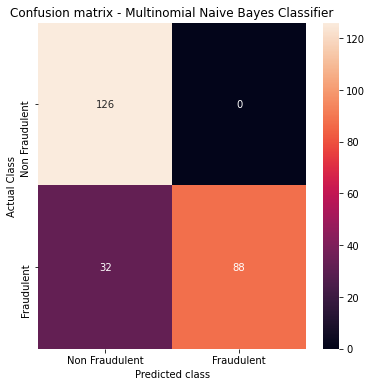

In [70]:
print("Multinomial Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), multinomialNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), multinomialNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), multinomialNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), multinomialNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), multinomialNBPredictions))
print(classification_report(y_test.flatten(), multinomialNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), multinomialNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Multinomial Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), multinomialNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Multinomial Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gaussian Naive Bayes Classifier
Accuracy:  0.983739837398374
Precision:  0.9754098360655737
Recall:  0.9916666666666667
F1-Score:  0.9834710743801653
AUC score:  0.9839285714285714
                precision    recall  f1-score   support

Non Fraudulent       0.99      0.98      0.98       126
    Fraudulent       0.98      0.99      0.98       120

      accuracy                           0.98       246
     macro avg       0.98      0.98      0.98       246
  weighted avg       0.98      0.98      0.98       246



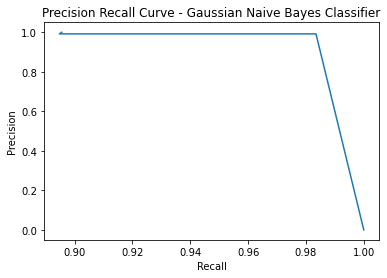

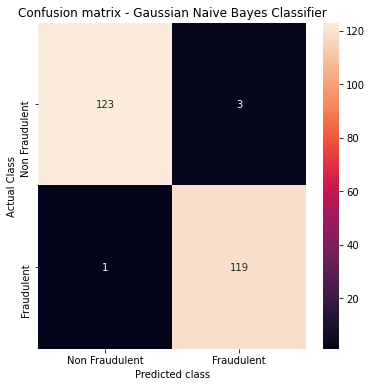

In [71]:
print("Gaussian Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gaussianNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gaussianNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), gaussianNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gaussianNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gaussianNBPredictions))
print(classification_report(y_test.flatten(), gaussianNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gaussianNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gaussian Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), gaussianNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gaussian Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Bernoulli Naive Bayes Classifier
Accuracy:  0.540650406504065
Precision:  0.7692307692307693
Recall:  0.08333333333333333
F1-Score:  0.15037593984962402
AUC score:  0.5297619047619047
                precision    recall  f1-score   support

Non Fraudulent       0.53      0.98      0.69       126
    Fraudulent       0.77      0.08      0.15       120

      accuracy                           0.54       246
     macro avg       0.65      0.53      0.42       246
  weighted avg       0.65      0.54      0.42       246



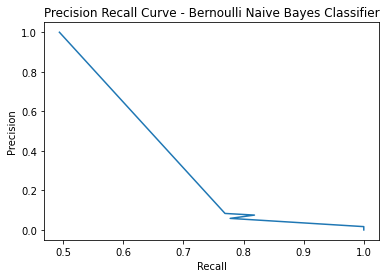

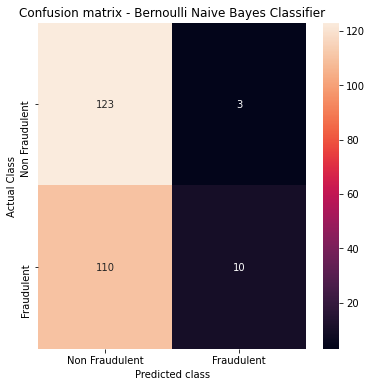

In [72]:
print("Bernoulli Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), bernoulliNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), bernoulliNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), bernoulliNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), bernoulliNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), bernoulliNBPredictions))
print(classification_report(y_test.flatten(), bernoulliNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), bernoulliNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Bernoulli Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), bernoulliNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Bernoulli Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier
Accuracy:  0.9959349593495935
Precision:  1.0
Recall:  0.9916666666666667
F1-Score:  0.99581589958159
AUC score:  0.9958333333333333
                precision    recall  f1-score   support

Non Fraudulent       0.99      1.00      1.00       126
    Fraudulent       1.00      0.99      1.00       120

      accuracy                           1.00       246
     macro avg       1.00      1.00      1.00       246
  weighted avg       1.00      1.00      1.00       246



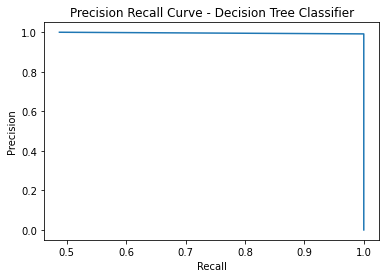

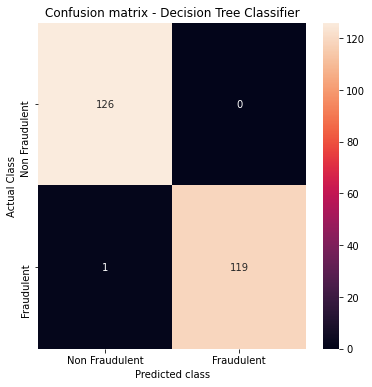

In [73]:
print("Decision Tree Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), decisionTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), decisionTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), decisionTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), decisionTreePredictions))
print(classification_report(y_test.flatten(), decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier
Accuracy:  0.991869918699187
Precision:  0.9916666666666667
Recall:  0.9916666666666667
F1-Score:  0.9916666666666667
AUC score:  0.9918650793650794
                precision    recall  f1-score   support

Non Fraudulent       0.99      0.99      0.99       126
    Fraudulent       0.99      0.99      0.99       120

      accuracy                           0.99       246
     macro avg       0.99      0.99      0.99       246
  weighted avg       0.99      0.99      0.99       246



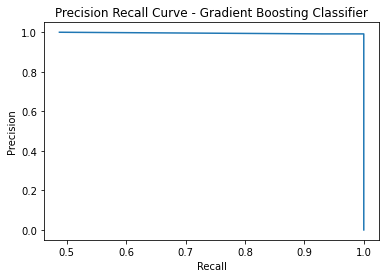

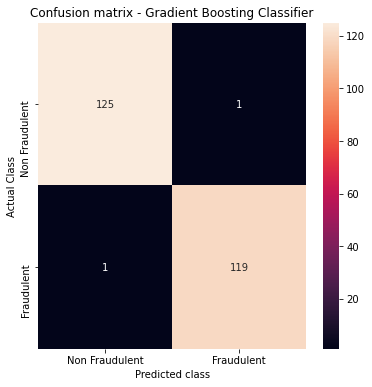

In [74]:
print("Gradient Boosting Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gradientBoostingPredictions))
print("Recall: ",recall_score(y_test.flatten(), gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gradientBoostingPredictions))
print(classification_report(y_test.flatten(), gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boost Classifier
Accuracy:  0.9959349593495935
Precision:  1.0
Recall:  0.9916666666666667
F1-Score:  0.99581589958159
AUC score:  0.9958333333333333
                precision    recall  f1-score   support

Non Fraudulent       0.99      1.00      1.00       126
    Fraudulent       1.00      0.99      1.00       120

      accuracy                           1.00       246
     macro avg       1.00      1.00      1.00       246
  weighted avg       1.00      1.00      1.00       246



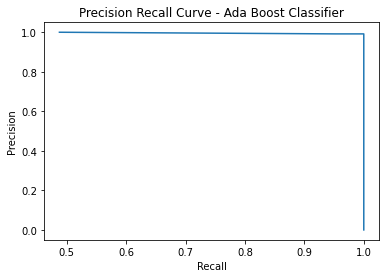

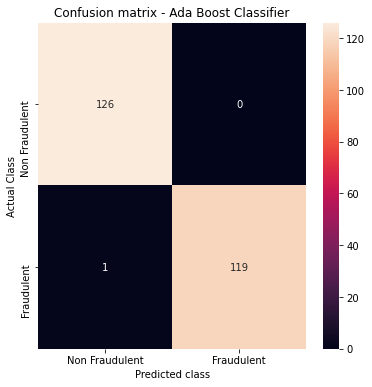

In [75]:
print("Ada Boost Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), adaBoostPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), adaBoostPredictions))
print("Recall: ",recall_score(y_test.flatten(), adaBoostPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), adaBoostPredictions))
print(classification_report(y_test.flatten(), adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Support Vector Machine Classifier
Accuracy:  0.9105691056910569
Precision:  0.9622641509433962
Recall:  0.85
F1-Score:  0.9026548672566371
AUC score:  0.9091269841269841
                precision    recall  f1-score   support

Non Fraudulent       0.87      0.97      0.92       126
    Fraudulent       0.96      0.85      0.90       120

      accuracy                           0.91       246
     macro avg       0.92      0.91      0.91       246
  weighted avg       0.92      0.91      0.91       246



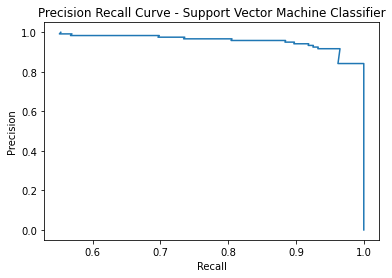

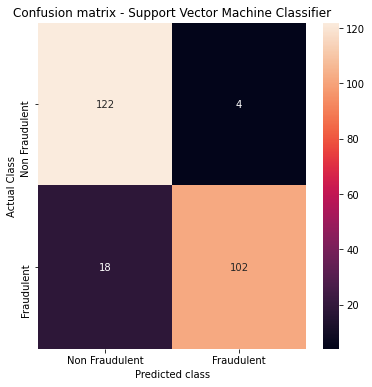

In [76]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), svmPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), svmPredictions))
print("Recall: ",recall_score(y_test.flatten(), svmPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), svmPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), svmPredictions))
print(classification_report(y_test.flatten(), svmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), svmPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), svmPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

## Test the model on original dataset

In [77]:
# Make predictions with the model
original_logisticRegressionPredictions = logisticRegressionModel.predict(X_original_scaled)
original_randomForestPredictions = randomForestModel.predict(X_original_scaled)
original_multinomialNBPredictions = multinomialNBModel.predict(X_original_scaled)
original_gaussianNBPredictions = gaussianNBModel.predict(X_original_scaled)
original_bernoulliNBPredictions = bernoulliNBModel.predict(X_original_scaled)
original_decisionTreePredictions = decisionTreeModel.predict(X_original_scaled)
original_gradientBoostingPredictions = gradientBoostingModel.predict(X_original_scaled)
original_adaBoostPredictions = adaBoostModel.predict(X_original_scaled)
original_svmPredictions = svmModel.predict(X_original_scaled)

In [78]:
original_logisticRegressionPredictProba = logisticRegressionModel.predict_proba(X_original_scaled)[:,1]
original_randomForestPredictProba = randomForestModel.predict_proba(X_original_scaled)[:,1]
original_multinomialNBPredictProba = multinomialNBModel.predict_proba(X_original_scaled)[:,1]
original_gaussianNBPredictProba = gaussianNBModel.predict_proba(X_original_scaled)[:,1]
original_bernoulliNBPredictProba = bernoulliNBModel.predict_proba(X_original_scaled)[:,1]
original_decisionTreePredictProba = decisionTreeModel.predict_proba(X_original_scaled)[:,1]
original_gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_original_scaled)[:,1]
original_adaBoostPredictProba = adaBoostModel.predict_proba(X_original_scaled)[:,1]
original_svmPredictProba = svmModel.predict_proba(X_original_scaled)[:,1]

Logistic Regression Classifier
Accuracy:  0.001727485630620034
Precision:  0.001727485630620034
Recall:  1.0
F1-Score:  0.0034490131405998624
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       0.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.00      0.50      0.00    284807
  weighted avg       0.00      0.00      0.00    284807



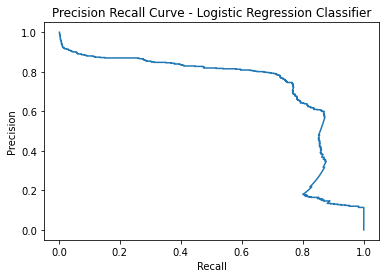

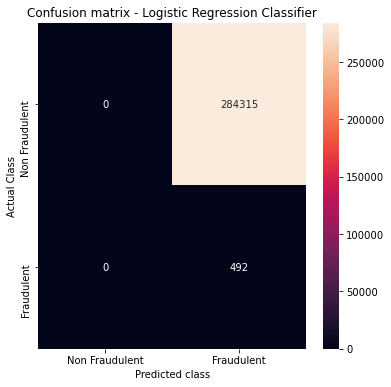

In [79]:
print("Logistic Regression Classifier")
print("==============================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_logisticRegressionPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_logisticRegressionPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_logisticRegressionPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_logisticRegressionPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_logisticRegressionPredictions))
print(classification_report(y_original.flatten(), original_logisticRegressionPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_logisticRegressionPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Logistic Regression Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_logisticRegressionPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Logistic Regression Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Random Forest Classifier
Accuracy:  0.001727485630620034
Precision:  0.001727485630620034
Recall:  1.0
F1-Score:  0.0034490131405998624
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       0.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.00      0.50      0.00    284807
  weighted avg       0.00      0.00      0.00    284807



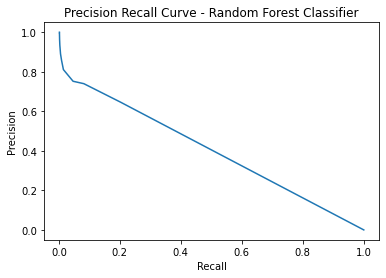

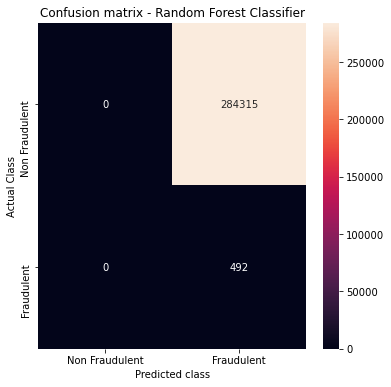

In [80]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_randomForestPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_randomForestPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_randomForestPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_randomForestPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_randomForestPredictions))
print(classification_report(y_original.flatten(), original_randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Multinomial Naive Bayes Classifier
Accuracy:  0.005010410558729245
Precision:  0.0017331755157253973
Recall:  1.0
F1-Score:  0.0034603536312613407
AUC score:  0.5016443029738142
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.01    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.01    284807
     macro avg       0.50      0.50      0.01    284807
  weighted avg       1.00      0.01      0.01    284807



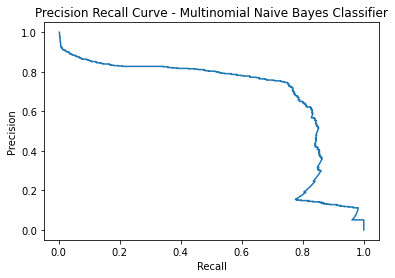

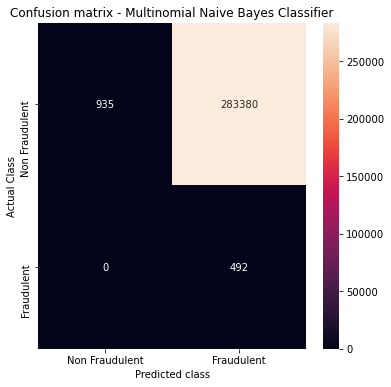

In [81]:
print("Multinomial Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_multinomialNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_multinomialNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_multinomialNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_multinomialNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_multinomialNBPredictions))
print(classification_report(y_original.flatten(), original_multinomialNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_multinomialNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Multinomial Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_multinomialNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Multinomial Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gaussian Naive Bayes Classifier
Accuracy:  0.001727485630620034
Precision:  0.001727485630620034
Recall:  1.0
F1-Score:  0.0034490131405998624
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       0.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.00      0.50      0.00    284807
  weighted avg       0.00      0.00      0.00    284807



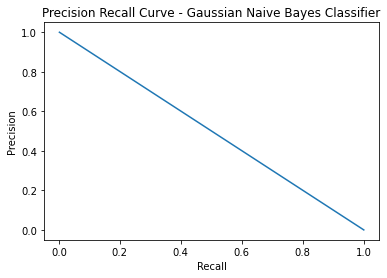

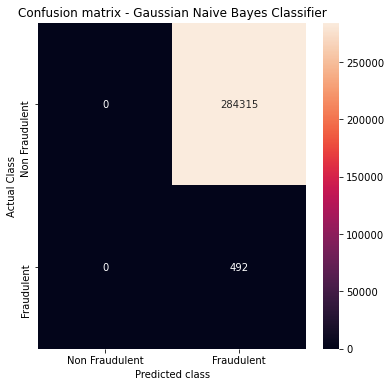

In [82]:
print("Gaussian Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_gaussianNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_gaussianNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_gaussianNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_gaussianNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_gaussianNBPredictions))
print(classification_report(y_original.flatten(), original_gaussianNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_gaussianNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gaussian Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_gaussianNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gaussian Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Bernoulli Naive Bayes Classifier
Accuracy:  0.9920507571794233
Precision:  0.01847826086956522
Recall:  0.06910569105691057
F1-Score:  0.029159519725557463
AUC score:  0.5313767908004248
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.99      1.00    284315
    Fraudulent       0.02      0.07      0.03       492

      accuracy                           0.99    284807
     macro avg       0.51      0.53      0.51    284807
  weighted avg       1.00      0.99      0.99    284807



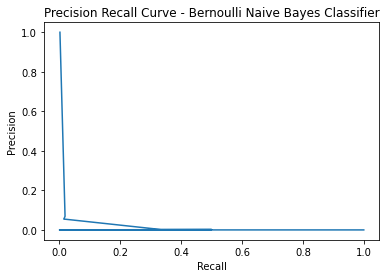

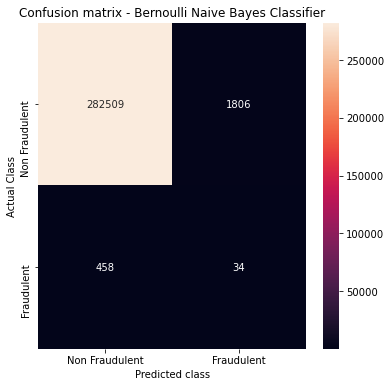

In [83]:
print("Bernoulli Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_bernoulliNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_bernoulliNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_bernoulliNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_bernoulliNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_bernoulliNBPredictions))
print(classification_report(y_original.flatten(), original_bernoulliNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_bernoulliNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Bernoulli Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_bernoulliNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Bernoulli Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier
Accuracy:  0.0017520636782101563
Precision:  0.0017275280898876404
Recall:  1.0
F1-Score:  0.003449097766498885
AUC score:  0.5000123102896435
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



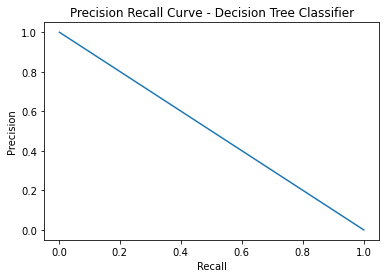

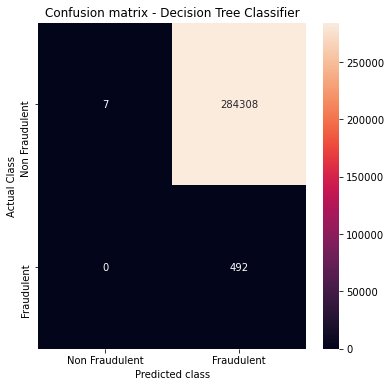

In [84]:
print("Decision Tree Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_decisionTreePredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_decisionTreePredictions))
print("Recall: ",recall_score(y_original.flatten(), original_decisionTreePredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_decisionTreePredictions))
print(classification_report(y_original.flatten(), original_decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier
Accuracy:  0.0017520636782101563
Precision:  0.0017275280898876404
Recall:  1.0
F1-Score:  0.003449097766498885
AUC score:  0.5000123102896435
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



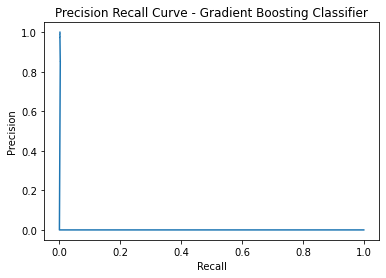

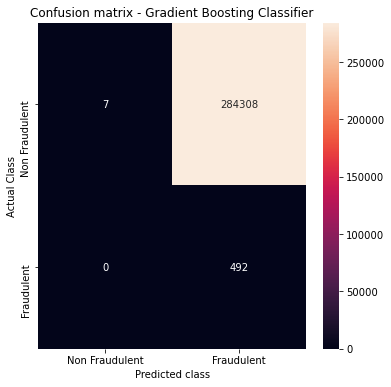

In [85]:
print("Gradient Boosting Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_gradientBoostingPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_gradientBoostingPredictions))
print(classification_report(y_original.flatten(), original_gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boost Classifier
Accuracy:  0.004262535682058376
Precision:  0.001731876023021279
Recall:  1.0
F1-Score:  0.003457763628121738
AUC score:  0.5012697184460897
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.01    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.01    284807



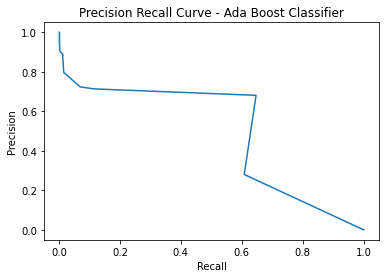

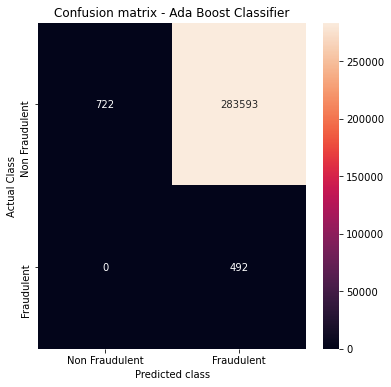

In [86]:
print("Ada Boost Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_adaBoostPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_adaBoostPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_adaBoostPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_adaBoostPredictions))
print(classification_report(y_original.flatten(), original_adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Support Vector Machine Classifier
Accuracy:  0.001727485630620034
Precision:  0.001727485630620034
Recall:  1.0
F1-Score:  0.0034490131405998624
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       0.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.00      0.50      0.00    284807
  weighted avg       0.00      0.00      0.00    284807



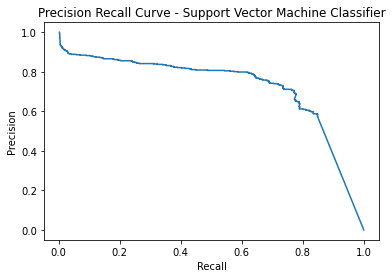

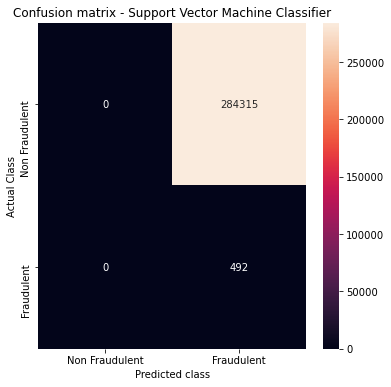

In [87]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_svmPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_svmPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_svmPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_svmPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_svmPredictions))
print(classification_report(y_original.flatten(), original_svmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_svmPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_svmPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

# Near Miss Undersampling

## NearMiss - 3 

In [88]:
# summarize class distribution
counter = Counter(y_original.flatten())
print(counter)

Counter({0: 284315, 1: 492})


In [89]:
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)

In [90]:
# transform the dataset
X, y = undersample.fit_resample(X_original, y_original)

In [91]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 492, 1: 492})


## Create a Train Test Split

Using `Class` for the y values (target feature)

In [92]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (738, 30) (738,) (246, 30) (246,)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [94]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

In [95]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Train the Models

In [96]:
logisticRegressionModel = LogisticRegression()
randomForestModel = RandomForestClassifier(n_estimators=200)
multinomialNBModel = MultinomialNB()
gaussianNBModel = GaussianNB()
bernoulliNBModel = BernoulliNB()
decisionTreeModel = DecisionTreeClassifier()
gradientBoostingModel = GradientBoostingClassifier(n_estimators=100)
adaBoostModel = AdaBoostClassifier(n_estimators=100)
svmModel = SVC(kernel='linear',probability=True)
denseModel = Sequential()
denseModel.add(Dense(units=200, activation='relu', input_dim=30))
denseModel.add(Dense(units=200, activation='relu'))
denseModel.add(Dense(units=200, activation='relu'))
denseModel.add(Dense(units=2, activation='softmax'))
denseModel.summary()
denseModel.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200)               6200      
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_18 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 402       
Total params: 87,002
Trainable params: 87,002
Non-trainable params: 0
_________________________________________________________________


In [97]:
logisticRegressionModel.fit(X_train_scaled, y_train.flatten())
randomForestModel.fit(X_train_scaled, y_train.flatten())
multinomialNBModel.fit(X_train_scaled, y_train.flatten())
gaussianNBModel.fit(X_train_scaled, y_train.flatten())
bernoulliNBModel.fit(X_train_scaled, y_train.flatten())
decisionTreeModel.fit(X_train_scaled, y_train.flatten())
gradientBoostingModel.fit(X_train_scaled, y_train.flatten())
adaBoostModel.fit(X_train_scaled, y_train.flatten())
svmModel.fit(X_train_scaled, y_train.flatten())
denseModel.fit(X_train_scaled,
               y_train_categorical,
               epochs=100,
               shuffle=True,
               verbose=2)

Train on 738 samples
Epoch 1/100
738/738 - 1s - loss: 0.5630 - accuracy: 0.7127
Epoch 2/100
738/738 - 0s - loss: 0.3336 - accuracy: 0.8930
Epoch 3/100
738/738 - 0s - loss: 0.2235 - accuracy: 0.9201
Epoch 4/100
738/738 - 0s - loss: 0.2580 - accuracy: 0.9079
Epoch 5/100
738/738 - 0s - loss: 0.2661 - accuracy: 0.9011
Epoch 6/100
738/738 - 0s - loss: 0.2243 - accuracy: 0.9146
Epoch 7/100
738/738 - 0s - loss: 0.2096 - accuracy: 0.9214
Epoch 8/100
738/738 - 0s - loss: 0.1957 - accuracy: 0.9282
Epoch 9/100
738/738 - 0s - loss: 0.2067 - accuracy: 0.9173
Epoch 10/100
738/738 - 0s - loss: 0.1928 - accuracy: 0.9282
Epoch 11/100
738/738 - 0s - loss: 0.1957 - accuracy: 0.9295
Epoch 12/100
738/738 - 0s - loss: 0.2300 - accuracy: 0.9106
Epoch 13/100
738/738 - 0s - loss: 0.1971 - accuracy: 0.9241
Epoch 14/100
738/738 - 0s - loss: 0.1880 - accuracy: 0.9201
Epoch 15/100
738/738 - 0s - loss: 0.1913 - accuracy: 0.9241
Epoch 16/100
738/738 - 0s - loss: 0.1785 - accuracy: 0.9255
Epoch 17/100
738/738 - 0s - 

In [98]:
print(f"Logistic Regression: Training Data Score: {logisticRegressionModel.score(X_train_scaled, y_train)}")
print(f"Logistic Regression: Testing Data Score: {logisticRegressionModel.score(X_test_scaled, y_test)}")
print(f"Random Forest: Training Data Score: {randomForestModel.score(X_train_scaled, y_train)}")
print(f"Random Forest: Testing Data Score: {randomForestModel.score(X_test_scaled, y_test)}")
print(f"Multinomial NB: Training Data Score: {multinomialNBModel.score(X_train_scaled, y_train)}")
print(f"Multinomial NB: Testing Data Score: {multinomialNBModel.score(X_test_scaled, y_test)}")
print(f"Gaussian NB: Training Data Score: {gaussianNBModel.score(X_train_scaled, y_train)}")
print(f"Gaussian NB: Testing Data Score: {gaussianNBModel.score(X_test_scaled, y_test)}")
print(f"Bernoulli NB: Training Data Score: {bernoulliNBModel.score(X_train_scaled, y_train)}")
print(f"Bernoulli NB: Testing Data Score: {bernoulliNBModel.score(X_test_scaled, y_test)}")
print(f"Decision Tree: Training Data Score: {decisionTreeModel.score(X_train_scaled, y_train)}")
print(f"Decision Tree: Testing Data Score: {decisionTreeModel.score(X_test_scaled, y_test)}")
print(f"Gradient Boosting: Training Data Score: {gradientBoostingModel.score(X_train_scaled, y_train)}")
print(f"Gradient Boosting: Testing Data Score: {gradientBoostingModel.score(X_test_scaled, y_test)}")
print(f"Ada Boost: Training Data Score: {adaBoostModel.score(X_train_scaled, y_train)}")
print(f"Ada Boost: Testing Data Score: {adaBoostModel.score(X_test_scaled, y_test)}")
print(f"Support Vector Machine: Training Data Score: {svmModel.score(X_train_scaled, y_train)}")
print(f"Support Vector Machine: Testing Data Score: {svmModel.score(X_test_scaled, y_test)}")
model_loss, model_accuracy = denseModel.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Logistic Regression: Training Data Score: 0.9308943089430894
Logistic Regression: Testing Data Score: 0.9024390243902439
Random Forest: Training Data Score: 1.0
Random Forest: Testing Data Score: 0.9227642276422764
Multinomial NB: Training Data Score: 0.8780487804878049
Multinomial NB: Testing Data Score: 0.8577235772357723
Gaussian NB: Training Data Score: 0.9037940379403794
Gaussian NB: Testing Data Score: 0.8861788617886179
Bernoulli NB: Training Data Score: 0.5474254742547425
Bernoulli NB: Testing Data Score: 0.5447154471544715
Decision Tree: Training Data Score: 1.0
Decision Tree: Testing Data Score: 0.8861788617886179
Gradient Boosting: Training Data Score: 1.0
Gradient Boosting: Testing Data Score: 0.9186991869918699
Ada Boost: Training Data Score: 1.0
Ada Boost: Testing Data Score: 0.9349593495934959
Support Vector Machine: Training Data Score: 0.9281842818428184
Support Vector Machine: Testing Data Score: 0.9065040650406504
246/246 - 0s - loss: 0.2502 - accuracy: 0.9146
Deep N

In [99]:
# Make predictions with the model
logisticRegressionPredictions = logisticRegressionModel.predict(X_test_scaled)
randomForestPredictions = randomForestModel.predict(X_test_scaled)
multinomialNBPredictions = multinomialNBModel.predict(X_test_scaled)
gaussianNBPredictions = gaussianNBModel.predict(X_test_scaled)
bernoulliNBPredictions = bernoulliNBModel.predict(X_test_scaled)
decisionTreePredictions = decisionTreeModel.predict(X_test_scaled)
gradientBoostingPredictions = gradientBoostingModel.predict(X_test_scaled)
adaBoostPredictions = adaBoostModel.predict(X_test_scaled)
svmPredictions = svmModel.predict(X_test_scaled)

In [100]:
logisticRegressionPredictProba = logisticRegressionModel.predict_proba(X_test_scaled)[:,1]
randomForestPredictProba = randomForestModel.predict_proba(X_test_scaled)[:,1]
multinomialNBPredictProba = multinomialNBModel.predict_proba(X_test_scaled)[:,1]
gaussianNBPredictProba = gaussianNBModel.predict_proba(X_test_scaled)[:,1]
bernoulliNBPredictProba = bernoulliNBModel.predict_proba(X_test_scaled)[:,1]
decisionTreePredictProba = decisionTreeModel.predict_proba(X_test_scaled)[:,1]
gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_test_scaled)[:,1]
adaBoostPredictProba = adaBoostModel.predict_proba(X_test_scaled)[:,1]
svmPredictProba = svmModel.predict_proba(X_test_scaled)[:,1]

Logistic Regression Classifier
Accuracy:  0.9024390243902439
Precision:  0.98
Recall:  0.8166666666666667
F1-Score:  0.890909090909091
AUC score:  0.9003968253968255
                precision    recall  f1-score   support

Non Fraudulent       0.85      0.98      0.91       126
    Fraudulent       0.98      0.82      0.89       120

      accuracy                           0.90       246
     macro avg       0.91      0.90      0.90       246
  weighted avg       0.91      0.90      0.90       246



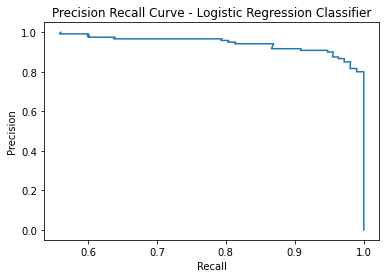

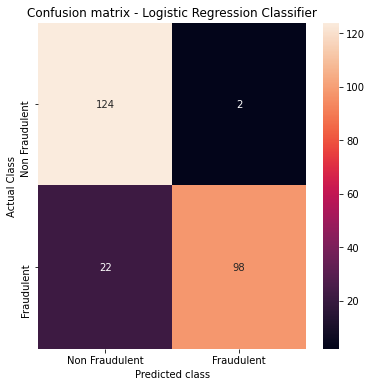

In [101]:
print("Logistic Regression Classifier")
print("==============================")
print("Accuracy: ",accuracy_score(y_test.flatten(), logisticRegressionPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), logisticRegressionPredictions))
print("Recall: ",recall_score(y_test.flatten(), logisticRegressionPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), logisticRegressionPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), logisticRegressionPredictions))
print(classification_report(y_test.flatten(), logisticRegressionPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), logisticRegressionPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Logistic Regression Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), logisticRegressionPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Logistic Regression Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Random Forest Classifier
Accuracy:  0.9227642276422764
Precision:  0.963302752293578
Recall:  0.875
F1-Score:  0.9170305676855894
AUC score:  0.9216269841269841
                precision    recall  f1-score   support

Non Fraudulent       0.89      0.97      0.93       126
    Fraudulent       0.96      0.88      0.92       120

      accuracy                           0.92       246
     macro avg       0.93      0.92      0.92       246
  weighted avg       0.93      0.92      0.92       246



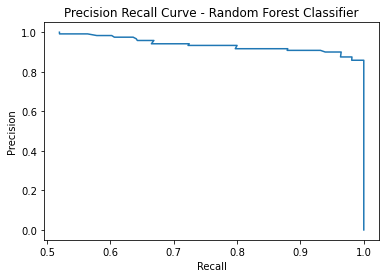

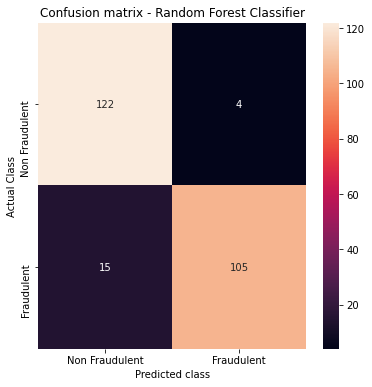

In [102]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomForestPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomForestPredictions))
print("Recall: ",recall_score(y_test.flatten(), randomForestPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomForestPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomForestPredictions))
print(classification_report(y_test.flatten(), randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Multinomial Naive Bayes Classifier
Accuracy:  0.8577235772357723
Precision:  0.9885057471264368
Recall:  0.7166666666666667
F1-Score:  0.8309178743961353
AUC score:  0.8543650793650794
                precision    recall  f1-score   support

Non Fraudulent       0.79      0.99      0.88       126
    Fraudulent       0.99      0.72      0.83       120

      accuracy                           0.86       246
     macro avg       0.89      0.85      0.85       246
  weighted avg       0.88      0.86      0.85       246



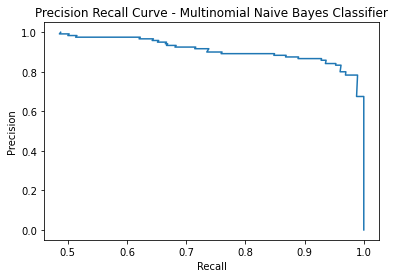

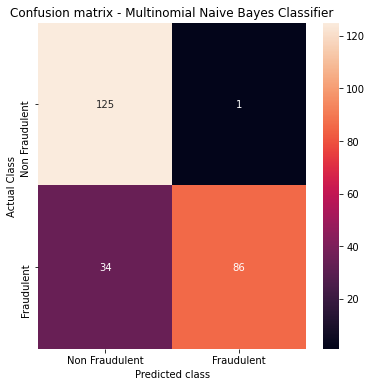

In [103]:
print("Multinomial Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), multinomialNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), multinomialNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), multinomialNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), multinomialNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), multinomialNBPredictions))
print(classification_report(y_test.flatten(), multinomialNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), multinomialNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Multinomial Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), multinomialNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Multinomial Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gaussian Naive Bayes Classifier
Accuracy:  0.8861788617886179
Precision:  0.96
Recall:  0.8
F1-Score:  0.8727272727272728
AUC score:  0.8841269841269841
                precision    recall  f1-score   support

Non Fraudulent       0.84      0.97      0.90       126
    Fraudulent       0.96      0.80      0.87       120

      accuracy                           0.89       246
     macro avg       0.90      0.88      0.88       246
  weighted avg       0.90      0.89      0.89       246



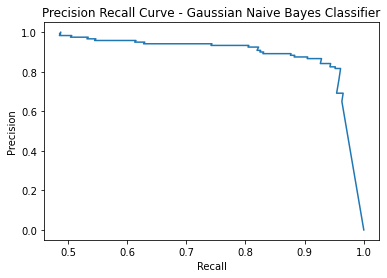

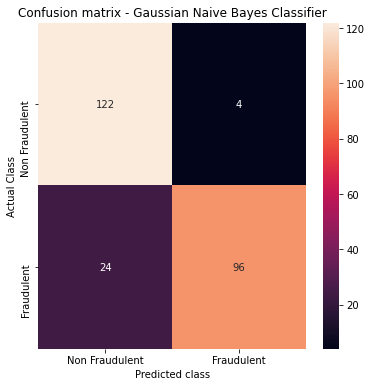

In [104]:
print("Gaussian Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gaussianNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gaussianNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), gaussianNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gaussianNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gaussianNBPredictions))
print(classification_report(y_test.flatten(), gaussianNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gaussianNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gaussian Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), gaussianNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gaussian Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Bernoulli Naive Bayes Classifier
Accuracy:  0.5447154471544715
Precision:  0.8333333333333334
Recall:  0.08333333333333333
F1-Score:  0.15151515151515152
AUC score:  0.5337301587301587
                precision    recall  f1-score   support

Non Fraudulent       0.53      0.98      0.69       126
    Fraudulent       0.83      0.08      0.15       120

      accuracy                           0.54       246
     macro avg       0.68      0.53      0.42       246
  weighted avg       0.68      0.54      0.43       246



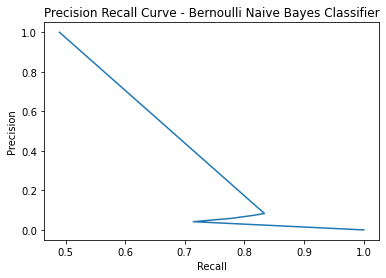

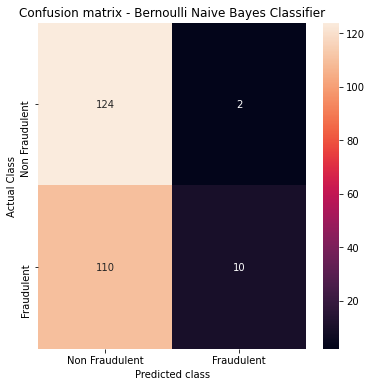

In [105]:
print("Bernoulli Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), bernoulliNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), bernoulliNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), bernoulliNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), bernoulliNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), bernoulliNBPredictions))
print(classification_report(y_test.flatten(), bernoulliNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), bernoulliNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Bernoulli Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), bernoulliNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Bernoulli Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier
Accuracy:  0.8861788617886179
Precision:  0.8898305084745762
Recall:  0.875
F1-Score:  0.8823529411764707
AUC score:  0.8859126984126984
                precision    recall  f1-score   support

Non Fraudulent       0.88      0.90      0.89       126
    Fraudulent       0.89      0.88      0.88       120

      accuracy                           0.89       246
     macro avg       0.89      0.89      0.89       246
  weighted avg       0.89      0.89      0.89       246



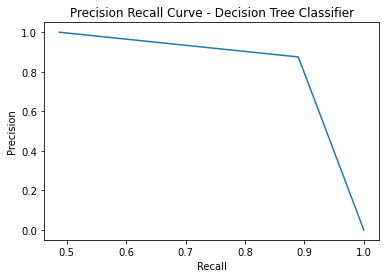

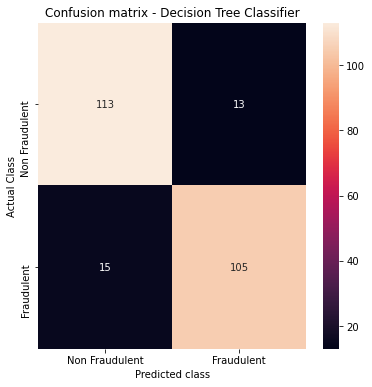

In [106]:
print("Decision Tree Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), decisionTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), decisionTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), decisionTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), decisionTreePredictions))
print(classification_report(y_test.flatten(), decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier
Accuracy:  0.9186991869918699
Precision:  0.9385964912280702
Recall:  0.8916666666666667
F1-Score:  0.9145299145299146
AUC score:  0.9180555555555554
                precision    recall  f1-score   support

Non Fraudulent       0.90      0.94      0.92       126
    Fraudulent       0.94      0.89      0.91       120

      accuracy                           0.92       246
     macro avg       0.92      0.92      0.92       246
  weighted avg       0.92      0.92      0.92       246



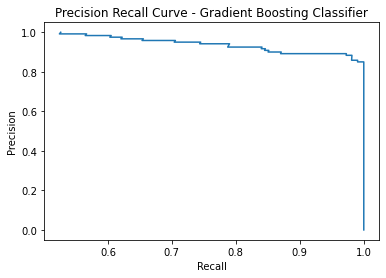

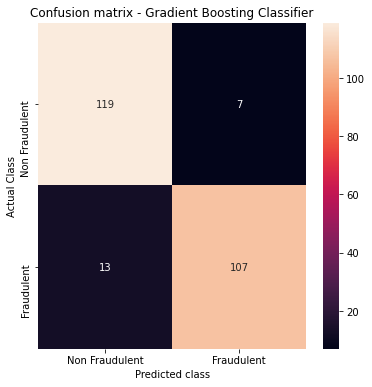

In [107]:
print("Gradient Boosting Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gradientBoostingPredictions))
print("Recall: ",recall_score(y_test.flatten(), gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gradientBoostingPredictions))
print(classification_report(y_test.flatten(), gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boost Classifier
Accuracy:  0.9349593495934959
Precision:  0.956140350877193
Recall:  0.9083333333333333
F1-Score:  0.9316239316239316
AUC score:  0.9343253968253967
                precision    recall  f1-score   support

Non Fraudulent       0.92      0.96      0.94       126
    Fraudulent       0.96      0.91      0.93       120

      accuracy                           0.93       246
     macro avg       0.94      0.93      0.93       246
  weighted avg       0.94      0.93      0.93       246



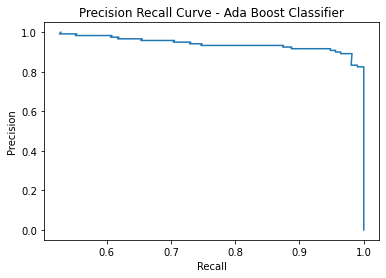

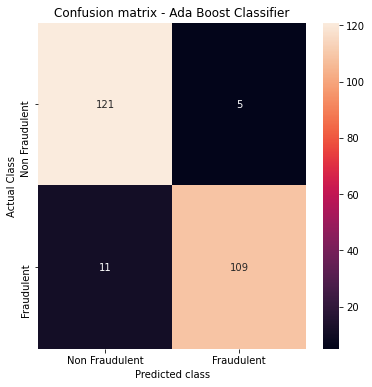

In [108]:
print("Ada Boost Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), adaBoostPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), adaBoostPredictions))
print("Recall: ",recall_score(y_test.flatten(), adaBoostPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), adaBoostPredictions))
print(classification_report(y_test.flatten(), adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Support Vector Machine Classifier
Accuracy:  0.9065040650406504
Precision:  0.98989898989899
Recall:  0.8166666666666667
F1-Score:  0.8949771689497718
AUC score:  0.9043650793650794
                precision    recall  f1-score   support

Non Fraudulent       0.85      0.99      0.92       126
    Fraudulent       0.99      0.82      0.89       120

      accuracy                           0.91       246
     macro avg       0.92      0.90      0.91       246
  weighted avg       0.92      0.91      0.91       246



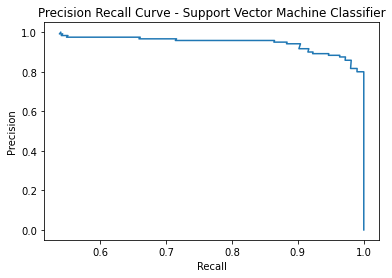

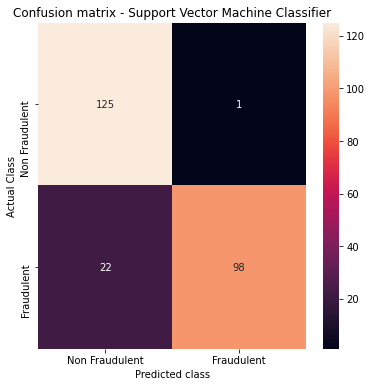

In [109]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), svmPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), svmPredictions))
print("Recall: ",recall_score(y_test.flatten(), svmPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), svmPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), svmPredictions))
print(classification_report(y_test.flatten(), svmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), svmPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), svmPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

## Test the model on original dataset

In [110]:
# Make predictions with the model
original_logisticRegressionPredictions = logisticRegressionModel.predict(X_original_scaled)
original_randomForestPredictions = randomForestModel.predict(X_original_scaled)
original_multinomialNBPredictions = multinomialNBModel.predict(X_original_scaled)
original_gaussianNBPredictions = gaussianNBModel.predict(X_original_scaled)
original_bernoulliNBPredictions = bernoulliNBModel.predict(X_original_scaled)
original_decisionTreePredictions = decisionTreeModel.predict(X_original_scaled)
original_gradientBoostingPredictions = gradientBoostingModel.predict(X_original_scaled)
original_adaBoostPredictions = adaBoostModel.predict(X_original_scaled)
original_svmPredictions = svmModel.predict(X_original_scaled)

In [111]:
original_logisticRegressionPredictProba = logisticRegressionModel.predict_proba(X_original_scaled)[:,1]
original_randomForestPredictProba = randomForestModel.predict_proba(X_original_scaled)[:,1]
original_multinomialNBPredictProba = multinomialNBModel.predict_proba(X_original_scaled)[:,1]
original_gaussianNBPredictProba = gaussianNBModel.predict_proba(X_original_scaled)[:,1]
original_bernoulliNBPredictProba = bernoulliNBModel.predict_proba(X_original_scaled)[:,1]
original_decisionTreePredictProba = decisionTreeModel.predict_proba(X_original_scaled)[:,1]
original_gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_original_scaled)[:,1]
original_adaBoostPredictProba = adaBoostModel.predict_proba(X_original_scaled)[:,1]
original_svmPredictProba = svmModel.predict_proba(X_original_scaled)[:,1]

Logistic Regression Classifier
Accuracy:  0.0017625971271773516
Precision:  0.001727546287355555
Recall:  1.0
F1-Score:  0.0034491340360126048
AUC score:  0.5000175861280622
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



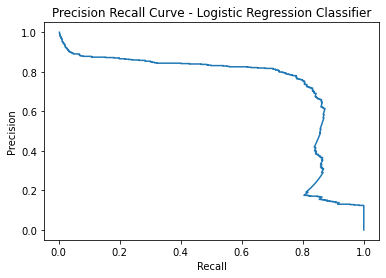

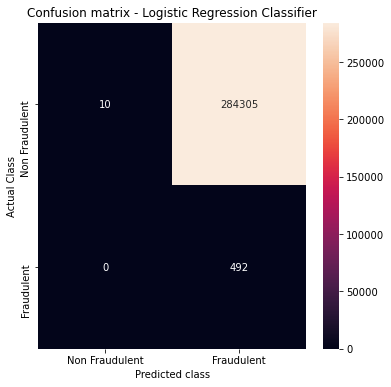

In [112]:
print("Logistic Regression Classifier")
print("==============================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_logisticRegressionPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_logisticRegressionPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_logisticRegressionPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_logisticRegressionPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_logisticRegressionPredictions))
print(classification_report(y_original.flatten(), original_logisticRegressionPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_logisticRegressionPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Logistic Regression Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_logisticRegressionPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Logistic Regression Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Random Forest Classifier
Accuracy:  0.001727485630620034
Precision:  0.001727485630620034
Recall:  1.0
F1-Score:  0.0034490131405998624
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       0.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.00      0.50      0.00    284807
  weighted avg       0.00      0.00      0.00    284807



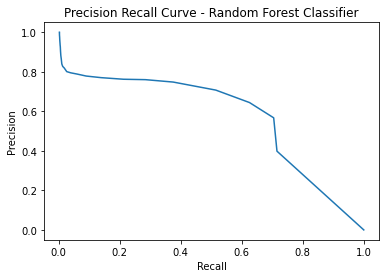

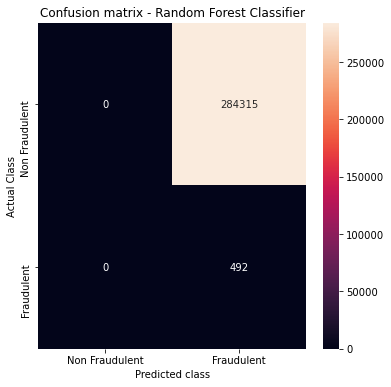

In [113]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_randomForestPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_randomForestPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_randomForestPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_randomForestPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_randomForestPredictions))
print(classification_report(y_original.flatten(), original_randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Multinomial Naive Bayes Classifier
Accuracy:  0.006151534196842072
Precision:  0.0017351620718963699
Recall:  1.0
F1-Score:  0.0034643129992712267
AUC score:  0.5022158521358353
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.01    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.01    284807
     macro avg       0.50      0.50      0.01    284807
  weighted avg       1.00      0.01      0.01    284807



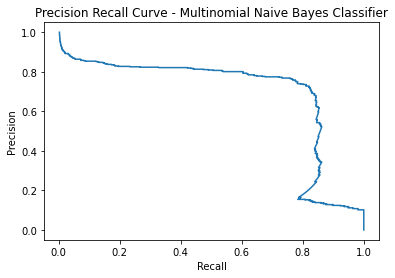

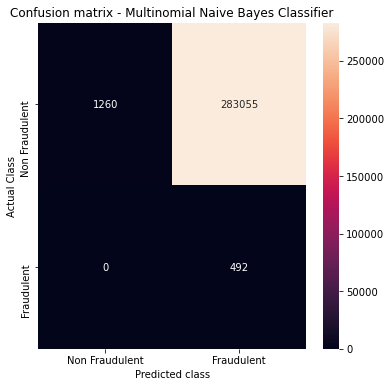

In [114]:
print("Multinomial Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_multinomialNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_multinomialNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_multinomialNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_multinomialNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_multinomialNBPredictions))
print(classification_report(y_original.flatten(), original_multinomialNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_multinomialNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Multinomial Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_multinomialNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Multinomial Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gaussian Naive Bayes Classifier
Accuracy:  0.001727485630620034
Precision:  0.001727485630620034
Recall:  1.0
F1-Score:  0.0034490131405998624
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       0.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.00      0.50      0.00    284807
  weighted avg       0.00      0.00      0.00    284807



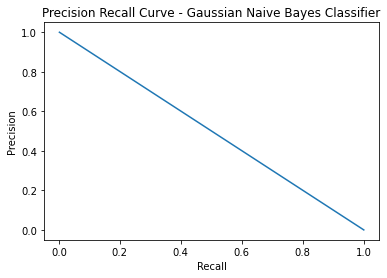

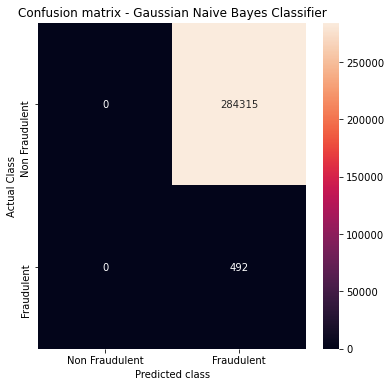

In [115]:
print("Gaussian Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_gaussianNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_gaussianNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_gaussianNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_gaussianNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_gaussianNBPredictions))
print(classification_report(y_original.flatten(), original_gaussianNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_gaussianNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gaussian Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_gaussianNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gaussian Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Bernoulli Naive Bayes Classifier
Accuracy:  0.9920577794787347
Precision:  0.018498367791077257
Recall:  0.06910569105691057
F1-Score:  0.029184549356223173
AUC score:  0.5313803080260372
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.99      1.00    284315
    Fraudulent       0.02      0.07      0.03       492

      accuracy                           0.99    284807
     macro avg       0.51      0.53      0.51    284807
  weighted avg       1.00      0.99      0.99    284807



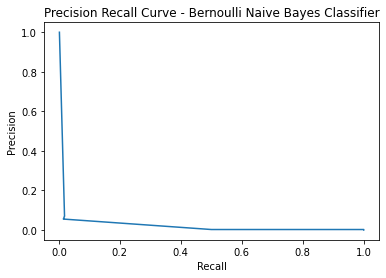

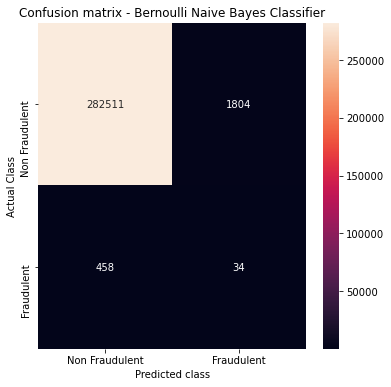

In [116]:
print("Bernoulli Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_bernoulliNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_bernoulliNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_bernoulliNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_bernoulliNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_bernoulliNBPredictions))
print(classification_report(y_original.flatten(), original_bernoulliNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_bernoulliNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Bernoulli Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_bernoulliNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Bernoulli Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier
Accuracy:  0.0023630037183074853
Precision:  0.0017285841771306908
Recall:  1.0
F1-Score:  0.0034512026599513184
AUC score:  0.5003183089179255
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



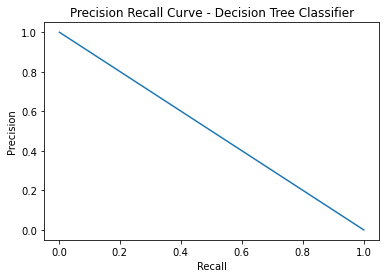

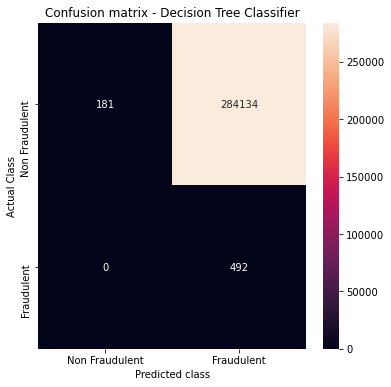

In [117]:
print("Decision Tree Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_decisionTreePredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_decisionTreePredictions))
print("Recall: ",recall_score(y_original.flatten(), original_decisionTreePredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_decisionTreePredictions))
print(classification_report(y_original.flatten(), original_decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier
Accuracy:  0.0021102009430947976
Precision:  0.0017281470189463924
Recall:  1.0
F1-Score:  0.0034503313580420076
AUC score:  0.5001916887958778
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



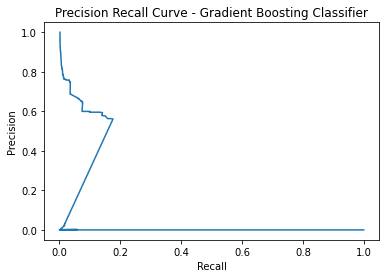

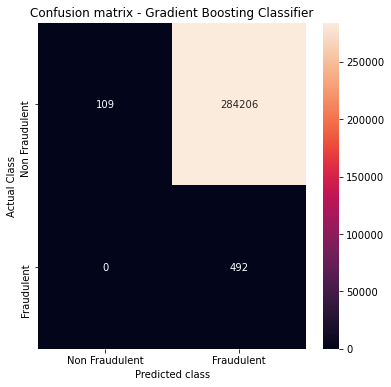

In [118]:
print("Gradient Boosting Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_gradientBoostingPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_gradientBoostingPredictions))
print(classification_report(y_original.flatten(), original_gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boost Classifier
Accuracy:  0.02366514867963217
Precision:  0.0017626553990745162
Recall:  0.9979674796747967
F1-Score:  0.0035190952126687427
AUC score:  0.5099733112634575
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.02      0.04    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.02    284807
     macro avg       0.50      0.51      0.02    284807
  weighted avg       1.00      0.02      0.04    284807



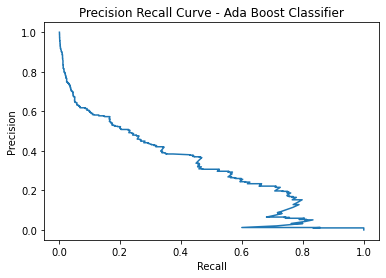

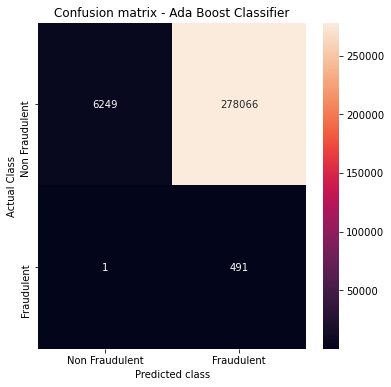

In [119]:
print("Ada Boost Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_adaBoostPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_adaBoostPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_adaBoostPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_adaBoostPredictions))
print(classification_report(y_original.flatten(), original_adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Support Vector Machine Classifier
Accuracy:  0.0017766417258002788
Precision:  0.0017275705512424815
Recall:  1.0
F1-Score:  0.0034491823965508176
AUC score:  0.5000246205792871
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.00    284807



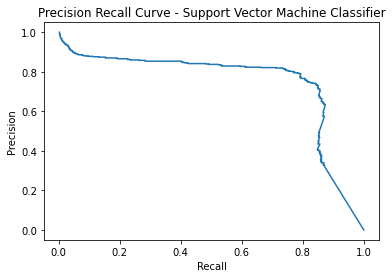

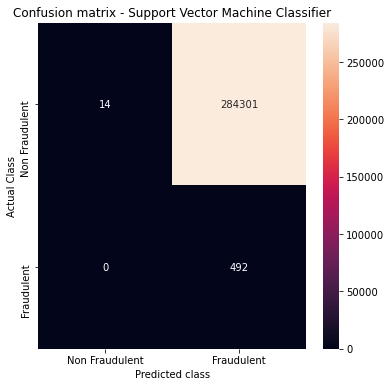

In [120]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_svmPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_svmPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_svmPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_svmPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_svmPredictions))
print(classification_report(y_original.flatten(), original_svmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_svmPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_svmPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

# Condensed Nearest Neighbor Rule Undersampling

In [122]:
# summarize class distribution
counter = Counter(y_original.flatten())
print(counter)

Counter({0: 284315, 1: 492})


In [123]:
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)

In [124]:
# transform the dataset
X, y = undersample.fit_resample(X_original, y_original)

In [125]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 2804, 1: 492})


## Create a Train Test Split

Using `Class` for the y values (target feature)

In [126]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [127]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (2472, 30) (2472,) (824, 30) (824,)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [128]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

In [129]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Train the Models

In [130]:
logisticRegressionModel = LogisticRegression()
randomForestModel = RandomForestClassifier(n_estimators=200)
multinomialNBModel = MultinomialNB()
gaussianNBModel = GaussianNB()
bernoulliNBModel = BernoulliNB()
decisionTreeModel = DecisionTreeClassifier()
gradientBoostingModel = GradientBoostingClassifier(n_estimators=100)
adaBoostModel = AdaBoostClassifier(n_estimators=100)
svmModel = SVC(kernel='linear',probability=True)
denseModel = Sequential()
denseModel.add(Dense(units=200, activation='relu', input_dim=30))
denseModel.add(Dense(units=200, activation='relu'))
denseModel.add(Dense(units=200, activation='relu'))
denseModel.add(Dense(units=2, activation='softmax'))
denseModel.summary()
denseModel.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 200)               6200      
_________________________________________________________________
dense_21 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_22 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 402       
Total params: 87,002
Trainable params: 87,002
Non-trainable params: 0
_________________________________________________________________


In [131]:
logisticRegressionModel.fit(X_train_scaled, y_train.flatten())
randomForestModel.fit(X_train_scaled, y_train.flatten())
multinomialNBModel.fit(X_train_scaled, y_train.flatten())
gaussianNBModel.fit(X_train_scaled, y_train.flatten())
bernoulliNBModel.fit(X_train_scaled, y_train.flatten())
decisionTreeModel.fit(X_train_scaled, y_train.flatten())
gradientBoostingModel.fit(X_train_scaled, y_train.flatten())
adaBoostModel.fit(X_train_scaled, y_train.flatten())
svmModel.fit(X_train_scaled, y_train.flatten())
denseModel.fit(X_train_scaled,
               y_train_categorical,
               epochs=100,
               shuffle=True,
               verbose=2)

Train on 2472 samples
Epoch 1/100
2472/2472 - 5s - loss: 0.2648 - accuracy: 0.9066
Epoch 2/100
2472/2472 - 0s - loss: 0.1131 - accuracy: 0.9701
Epoch 3/100
2472/2472 - 0s - loss: 0.1084 - accuracy: 0.9725
Epoch 4/100
2472/2472 - 0s - loss: 0.1299 - accuracy: 0.9660
Epoch 5/100
2472/2472 - 0s - loss: 0.0950 - accuracy: 0.9749
Epoch 6/100
2472/2472 - 0s - loss: 0.1051 - accuracy: 0.9733
Epoch 7/100
2472/2472 - 0s - loss: 0.0957 - accuracy: 0.9737
Epoch 8/100
2472/2472 - 0s - loss: 0.0959 - accuracy: 0.9757
Epoch 9/100
2472/2472 - 0s - loss: 0.0957 - accuracy: 0.9753
Epoch 10/100
2472/2472 - 0s - loss: 0.0968 - accuracy: 0.9737
Epoch 11/100
2472/2472 - 0s - loss: 0.0953 - accuracy: 0.9761
Epoch 12/100
2472/2472 - 0s - loss: 0.0957 - accuracy: 0.9749
Epoch 13/100
2472/2472 - 0s - loss: 0.0904 - accuracy: 0.9749
Epoch 14/100
2472/2472 - 0s - loss: 0.1108 - accuracy: 0.9689
Epoch 15/100
2472/2472 - 0s - loss: 0.0899 - accuracy: 0.9765
Epoch 16/100
2472/2472 - 0s - loss: 0.0868 - accuracy: 0.

In [132]:
print(f"Logistic Regression: Training Data Score: {logisticRegressionModel.score(X_train_scaled, y_train)}")
print(f"Logistic Regression: Testing Data Score: {logisticRegressionModel.score(X_test_scaled, y_test)}")
print(f"Random Forest: Training Data Score: {randomForestModel.score(X_train_scaled, y_train)}")
print(f"Random Forest: Testing Data Score: {randomForestModel.score(X_test_scaled, y_test)}")
print(f"Multinomial NB: Training Data Score: {multinomialNBModel.score(X_train_scaled, y_train)}")
print(f"Multinomial NB: Testing Data Score: {multinomialNBModel.score(X_test_scaled, y_test)}")
print(f"Gaussian NB: Training Data Score: {gaussianNBModel.score(X_train_scaled, y_train)}")
print(f"Gaussian NB: Testing Data Score: {gaussianNBModel.score(X_test_scaled, y_test)}")
print(f"Bernoulli NB: Training Data Score: {bernoulliNBModel.score(X_train_scaled, y_train)}")
print(f"Bernoulli NB: Testing Data Score: {bernoulliNBModel.score(X_test_scaled, y_test)}")
print(f"Decision Tree: Training Data Score: {decisionTreeModel.score(X_train_scaled, y_train)}")
print(f"Decision Tree: Testing Data Score: {decisionTreeModel.score(X_test_scaled, y_test)}")
print(f"Gradient Boosting: Training Data Score: {gradientBoostingModel.score(X_train_scaled, y_train)}")
print(f"Gradient Boosting: Testing Data Score: {gradientBoostingModel.score(X_test_scaled, y_test)}")
print(f"Ada Boost: Training Data Score: {adaBoostModel.score(X_train_scaled, y_train)}")
print(f"Ada Boost: Testing Data Score: {adaBoostModel.score(X_test_scaled, y_test)}")
print(f"Support Vector Machine: Training Data Score: {svmModel.score(X_train_scaled, y_train)}")
print(f"Support Vector Machine: Testing Data Score: {svmModel.score(X_test_scaled, y_test)}")
model_loss, model_accuracy = denseModel.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Logistic Regression: Training Data Score: 0.9716828478964401
Logistic Regression: Testing Data Score: 0.9575242718446602
Random Forest: Training Data Score: 1.0
Random Forest: Testing Data Score: 0.9635922330097088
Multinomial NB: Training Data Score: 0.8511326860841424
Multinomial NB: Testing Data Score: 0.8507281553398058
Gaussian NB: Training Data Score: 0.9567152103559871
Gaussian NB: Testing Data Score: 0.9381067961165048
Bernoulli NB: Training Data Score: 0.8559870550161812
Bernoulli NB: Testing Data Score: 0.8555825242718447
Decision Tree: Training Data Score: 1.0
Decision Tree: Testing Data Score: 0.9514563106796117
Gradient Boosting: Training Data Score: 0.9967637540453075
Gradient Boosting: Testing Data Score: 0.9575242718446602
Ada Boost: Training Data Score: 0.9959546925566343
Ada Boost: Testing Data Score: 0.9660194174757282
Support Vector Machine: Training Data Score: 0.9745145631067961
Support Vector Machine: Testing Data Score: 0.9587378640776699
824/824 - 0s - loss: 0.

In [133]:
# Make predictions with the model
logisticRegressionPredictions = logisticRegressionModel.predict(X_test_scaled)
randomForestPredictions = randomForestModel.predict(X_test_scaled)
multinomialNBPredictions = multinomialNBModel.predict(X_test_scaled)
gaussianNBPredictions = gaussianNBModel.predict(X_test_scaled)
bernoulliNBPredictions = bernoulliNBModel.predict(X_test_scaled)
decisionTreePredictions = decisionTreeModel.predict(X_test_scaled)
gradientBoostingPredictions = gradientBoostingModel.predict(X_test_scaled)
adaBoostPredictions = adaBoostModel.predict(X_test_scaled)
svmPredictions = svmModel.predict(X_test_scaled)

In [134]:
logisticRegressionPredictProba = logisticRegressionModel.predict_proba(X_test_scaled)[:,1]
randomForestPredictProba = randomForestModel.predict_proba(X_test_scaled)[:,1]
multinomialNBPredictProba = multinomialNBModel.predict_proba(X_test_scaled)[:,1]
gaussianNBPredictProba = gaussianNBModel.predict_proba(X_test_scaled)[:,1]
bernoulliNBPredictProba = bernoulliNBModel.predict_proba(X_test_scaled)[:,1]
decisionTreePredictProba = decisionTreeModel.predict_proba(X_test_scaled)[:,1]
gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_test_scaled)[:,1]
adaBoostPredictProba = adaBoostModel.predict_proba(X_test_scaled)[:,1]
svmPredictProba = svmModel.predict_proba(X_test_scaled)[:,1]

Logistic Regression Classifier
Accuracy:  0.9575242718446602
Precision:  1.0
Recall:  0.7154471544715447
F1-Score:  0.8341232227488152
AUC score:  0.8577235772357723
                precision    recall  f1-score   support

Non Fraudulent       0.95      1.00      0.98       701
    Fraudulent       1.00      0.72      0.83       123

      accuracy                           0.96       824
     macro avg       0.98      0.86      0.90       824
  weighted avg       0.96      0.96      0.95       824



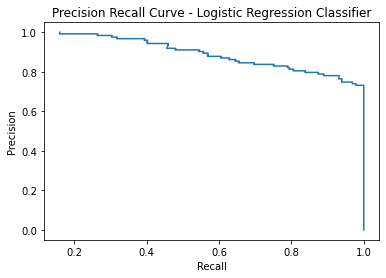

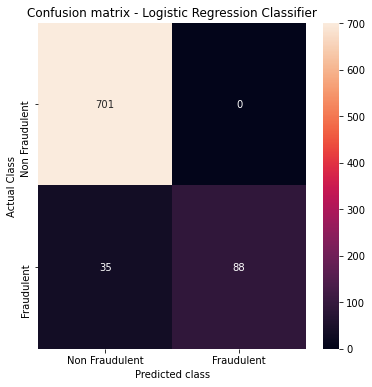

In [135]:
print("Logistic Regression Classifier")
print("==============================")
print("Accuracy: ",accuracy_score(y_test.flatten(), logisticRegressionPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), logisticRegressionPredictions))
print("Recall: ",recall_score(y_test.flatten(), logisticRegressionPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), logisticRegressionPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), logisticRegressionPredictions))
print(classification_report(y_test.flatten(), logisticRegressionPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), logisticRegressionPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Logistic Regression Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), logisticRegressionPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Logistic Regression Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Random Forest Classifier
Accuracy:  0.9635922330097088
Precision:  0.979381443298969
Recall:  0.7723577235772358
F1-Score:  0.8636363636363636
AUC score:  0.8847523282650801
                precision    recall  f1-score   support

Non Fraudulent       0.96      1.00      0.98       701
    Fraudulent       0.98      0.77      0.86       123

      accuracy                           0.96       824
     macro avg       0.97      0.88      0.92       824
  weighted avg       0.96      0.96      0.96       824



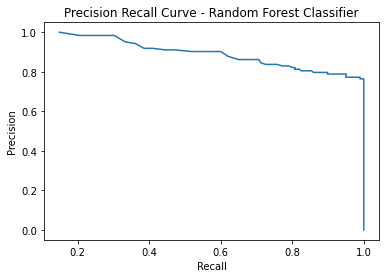

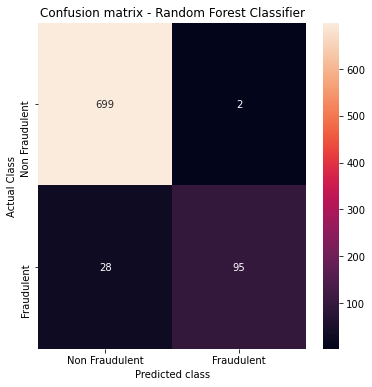

In [136]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomForestPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomForestPredictions))
print("Recall: ",recall_score(y_test.flatten(), randomForestPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomForestPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomForestPredictions))
print(classification_report(y_test.flatten(), randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Multinomial Naive Bayes Classifier
Accuracy:  0.8507281553398058
Precision:  0.0
Recall:  0.0
F1-Score:  0.0
AUC score:  0.5
                precision    recall  f1-score   support

Non Fraudulent       0.85      1.00      0.92       701
    Fraudulent       0.00      0.00      0.00       123

      accuracy                           0.85       824
     macro avg       0.43      0.50      0.46       824
  weighted avg       0.72      0.85      0.78       824



C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


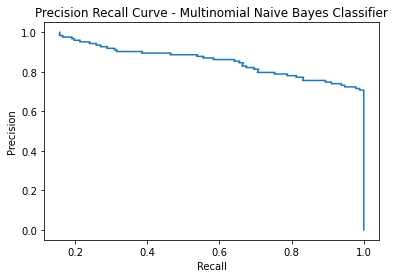

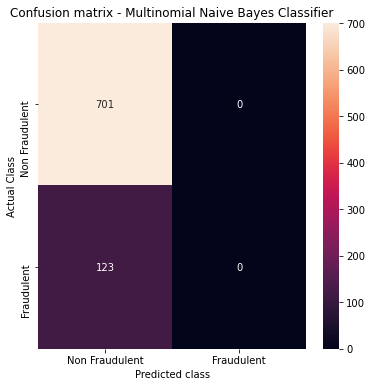

In [137]:
print("Multinomial Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), multinomialNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), multinomialNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), multinomialNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), multinomialNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), multinomialNBPredictions))
print(classification_report(y_test.flatten(), multinomialNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), multinomialNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Multinomial Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), multinomialNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Multinomial Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gaussian Naive Bayes Classifier
Accuracy:  0.9381067961165048
Precision:  0.8214285714285714
Recall:  0.7479674796747967
F1-Score:  0.7829787234042553
AUC score:  0.8597184046020204
                precision    recall  f1-score   support

Non Fraudulent       0.96      0.97      0.96       701
    Fraudulent       0.82      0.75      0.78       123

      accuracy                           0.94       824
     macro avg       0.89      0.86      0.87       824
  weighted avg       0.94      0.94      0.94       824



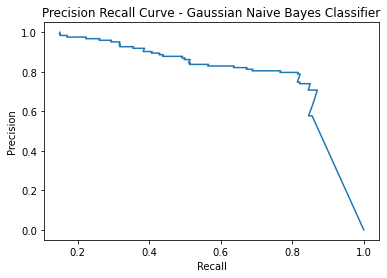

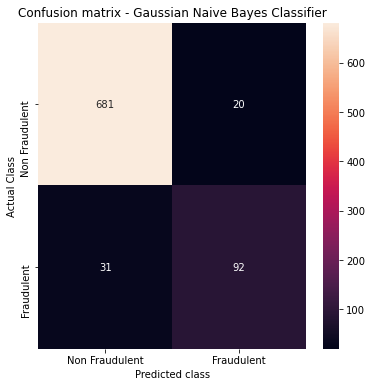

In [138]:
print("Gaussian Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gaussianNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gaussianNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), gaussianNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gaussianNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gaussianNBPredictions))
print(classification_report(y_test.flatten(), gaussianNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gaussianNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gaussian Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), gaussianNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gaussian Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Bernoulli Naive Bayes Classifier
Accuracy:  0.8555825242718447
Precision:  0.8333333333333334
Recall:  0.04065040650406504
F1-Score:  0.07751937984496124
AUC score:  0.5196119364902636
                precision    recall  f1-score   support

Non Fraudulent       0.86      1.00      0.92       701
    Fraudulent       0.83      0.04      0.08       123

      accuracy                           0.86       824
     macro avg       0.84      0.52      0.50       824
  weighted avg       0.85      0.86      0.80       824



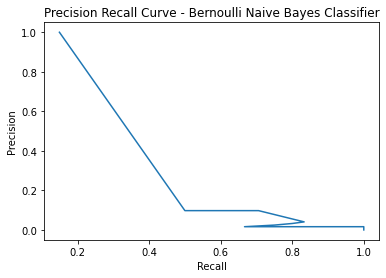

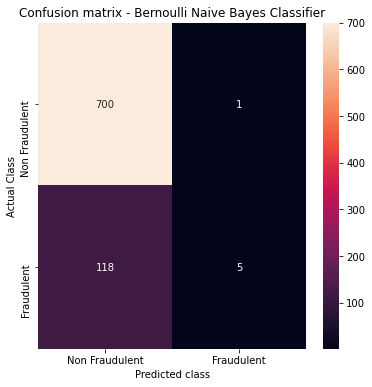

In [139]:
print("Bernoulli Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), bernoulliNBPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), bernoulliNBPredictions))
print("Recall: ",recall_score(y_test.flatten(), bernoulliNBPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), bernoulliNBPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), bernoulliNBPredictions))
print(classification_report(y_test.flatten(), bernoulliNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), bernoulliNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Bernoulli Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), bernoulliNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Bernoulli Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier
Accuracy:  0.9514563106796117
Precision:  0.8547008547008547
Recall:  0.8130081300813008
F1-Score:  0.8333333333333333
AUC score:  0.894378530090579
                precision    recall  f1-score   support

Non Fraudulent       0.97      0.98      0.97       701
    Fraudulent       0.85      0.81      0.83       123

      accuracy                           0.95       824
     macro avg       0.91      0.89      0.90       824
  weighted avg       0.95      0.95      0.95       824



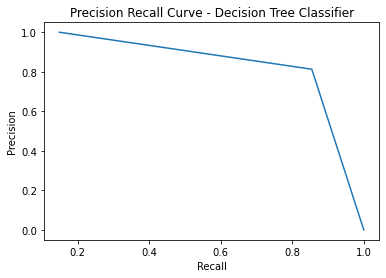

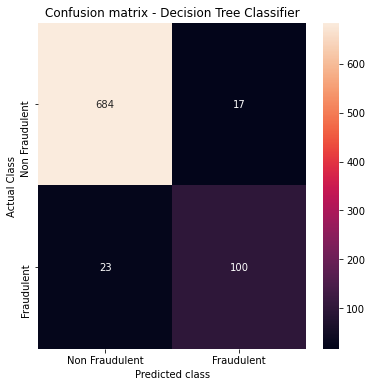

In [140]:
print("Decision Tree Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), decisionTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), decisionTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), decisionTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), decisionTreePredictions))
print(classification_report(y_test.flatten(), decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier
Accuracy:  0.9575242718446602
Precision:  0.9230769230769231
Recall:  0.7804878048780488
F1-Score:  0.8458149779735684
AUC score:  0.8845377683448732
                precision    recall  f1-score   support

Non Fraudulent       0.96      0.99      0.98       701
    Fraudulent       0.92      0.78      0.85       123

      accuracy                           0.96       824
     macro avg       0.94      0.88      0.91       824
  weighted avg       0.96      0.96      0.96       824



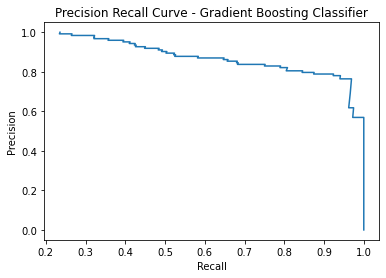

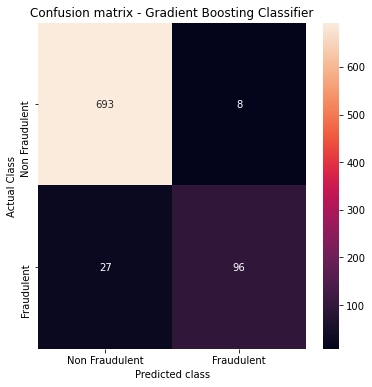

In [141]:
print("Gradient Boosting Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gradientBoostingPredictions))
print("Recall: ",recall_score(y_test.flatten(), gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gradientBoostingPredictions))
print(classification_report(y_test.flatten(), gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boost Classifier
Accuracy:  0.9660194174757282
Precision:  0.9611650485436893
Recall:  0.8048780487804879
F1-Score:  0.8761061946902655
AUC score:  0.8995859573431684
                precision    recall  f1-score   support

Non Fraudulent       0.97      0.99      0.98       701
    Fraudulent       0.96      0.80      0.88       123

      accuracy                           0.97       824
     macro avg       0.96      0.90      0.93       824
  weighted avg       0.97      0.97      0.96       824



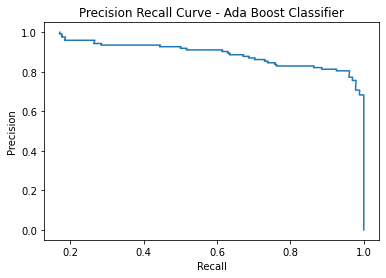

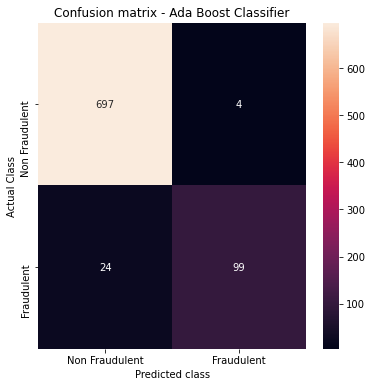

In [142]:
print("Ada Boost Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), adaBoostPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), adaBoostPredictions))
print("Recall: ",recall_score(y_test.flatten(), adaBoostPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), adaBoostPredictions))
print(classification_report(y_test.flatten(), adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Support Vector Machine Classifier
Accuracy:  0.9587378640776699
Precision:  1.0
Recall:  0.7235772357723578
F1-Score:  0.839622641509434
AUC score:  0.8617886178861789
                precision    recall  f1-score   support

Non Fraudulent       0.95      1.00      0.98       701
    Fraudulent       1.00      0.72      0.84       123

      accuracy                           0.96       824
     macro avg       0.98      0.86      0.91       824
  weighted avg       0.96      0.96      0.96       824



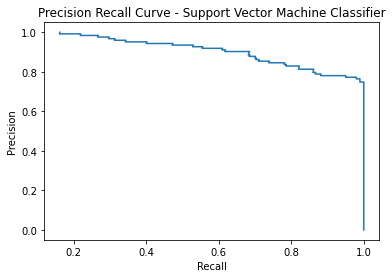

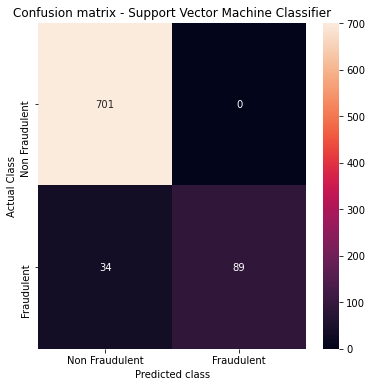

In [143]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_test.flatten(), svmPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), svmPredictions))
print("Recall: ",recall_score(y_test.flatten(), svmPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), svmPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), svmPredictions))
print(classification_report(y_test.flatten(), svmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), svmPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), svmPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

## Test the model on original dataset

In [144]:
# Make predictions with the model
original_logisticRegressionPredictions = logisticRegressionModel.predict(X_original_scaled)
original_randomForestPredictions = randomForestModel.predict(X_original_scaled)
original_multinomialNBPredictions = multinomialNBModel.predict(X_original_scaled)
original_gaussianNBPredictions = gaussianNBModel.predict(X_original_scaled)
original_bernoulliNBPredictions = bernoulliNBModel.predict(X_original_scaled)
original_decisionTreePredictions = decisionTreeModel.predict(X_original_scaled)
original_gradientBoostingPredictions = gradientBoostingModel.predict(X_original_scaled)
original_adaBoostPredictions = adaBoostModel.predict(X_original_scaled)
original_svmPredictions = svmModel.predict(X_original_scaled)

In [145]:
original_logisticRegressionPredictProba = logisticRegressionModel.predict_proba(X_original_scaled)[:,1]
original_randomForestPredictProba = randomForestModel.predict_proba(X_original_scaled)[:,1]
original_multinomialNBPredictProba = multinomialNBModel.predict_proba(X_original_scaled)[:,1]
original_gaussianNBPredictProba = gaussianNBModel.predict_proba(X_original_scaled)[:,1]
original_bernoulliNBPredictProba = bernoulliNBModel.predict_proba(X_original_scaled)[:,1]
original_decisionTreePredictProba = decisionTreeModel.predict_proba(X_original_scaled)[:,1]
original_gradientBoostingPredictProba = gradientBoostingModel.predict_proba(X_original_scaled)[:,1]
original_adaBoostPredictProba = adaBoostModel.predict_proba(X_original_scaled)[:,1]
original_svmPredictProba = svmModel.predict_proba(X_original_scaled)[:,1]

Logistic Regression Classifier
Accuracy:  0.6142370096240612
Precision:  0.004377299668304
Recall:  0.9817073170731707
F1-Score:  0.008715737048198205
AUC score:  0.7976542142582321
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.61      0.76    284315
    Fraudulent       0.00      0.98      0.01       492

      accuracy                           0.61    284807
     macro avg       0.50      0.80      0.38    284807
  weighted avg       1.00      0.61      0.76    284807



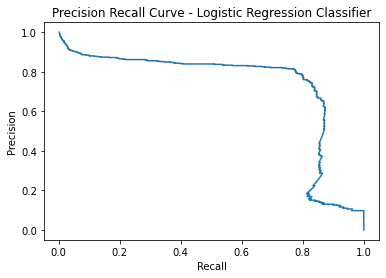

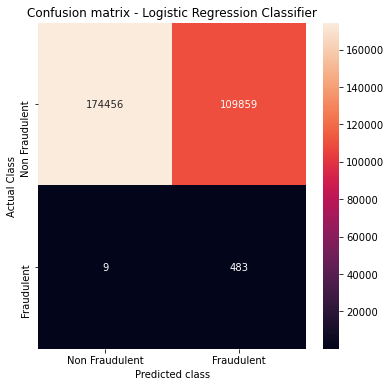

In [146]:
print("Logistic Regression Classifier")
print("==============================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_logisticRegressionPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_logisticRegressionPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_logisticRegressionPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_logisticRegressionPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_logisticRegressionPredictions))
print(classification_report(y_original.flatten(), original_logisticRegressionPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_logisticRegressionPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Logistic Regression Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_logisticRegressionPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Logistic Regression Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Random Forest Classifier
Accuracy:  0.02878089372803337
Precision:  0.001775519483800189
Recall:  1.0
F1-Score:  0.0035447452034265865
AUC score:  0.5135501116719132
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.03      0.05    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.03    284807
     macro avg       0.50      0.51      0.03    284807
  weighted avg       1.00      0.03      0.05    284807



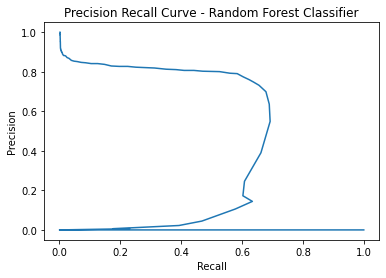

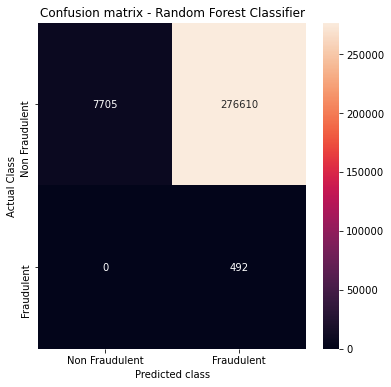

In [147]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_randomForestPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_randomForestPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_randomForestPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_randomForestPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_randomForestPredictions))
print(classification_report(y_original.flatten(), original_randomForestPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_randomForestPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_randomForestPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Multinomial Naive Bayes Classifier
Accuracy:  0.9982725143693799
Precision:  0.0


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall:  0.0
F1-Score:  0.0
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00    284315
    Fraudulent       0.00      0.00      0.00       492

      accuracy                           1.00    284807
     macro avg       0.50      0.50      0.50    284807
  weighted avg       1.00      1.00      1.00    284807



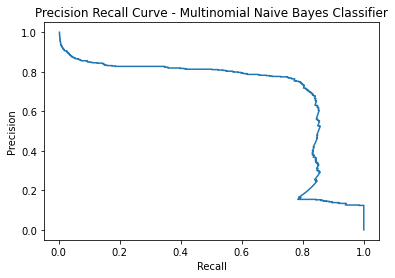

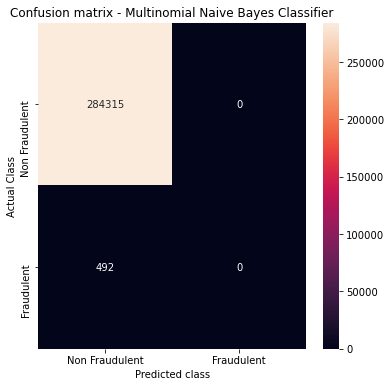

In [148]:
print("Multinomial Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_multinomialNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_multinomialNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_multinomialNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_multinomialNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_multinomialNBPredictions))
print(classification_report(y_original.flatten(), original_multinomialNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_multinomialNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Multinomial Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_multinomialNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Multinomial Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gaussian Naive Bayes Classifier
Accuracy:  0.001727485630620034
Precision:  0.001727485630620034
Recall:  1.0
F1-Score:  0.0034490131405998624
AUC score:  0.5


C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Non Fraudulent       0.00      0.00      0.00    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.00      0.50      0.00    284807
  weighted avg       0.00      0.00      0.00    284807



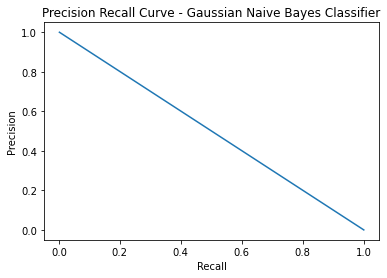

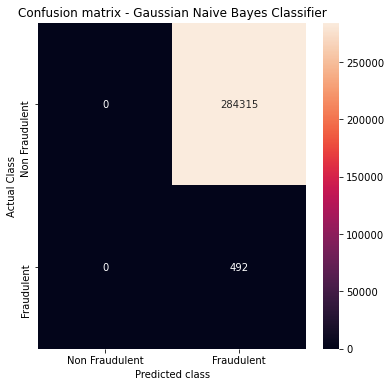

In [149]:
print("Gaussian Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_gaussianNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_gaussianNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_gaussianNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_gaussianNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_gaussianNBPredictions))
print(classification_report(y_original.flatten(), original_gaussianNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_gaussianNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gaussian Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_gaussianNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gaussian Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Bernoulli Naive Bayes Classifier
Accuracy:  0.9982795366686914
Precision:  0.5714285714285714
Recall:  0.016260162601626018
F1-Score:  0.0316205533596838
AUC score:  0.5081195296239757
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00    284315
    Fraudulent       0.57      0.02      0.03       492

      accuracy                           1.00    284807
     macro avg       0.78      0.51      0.52    284807
  weighted avg       1.00      1.00      1.00    284807



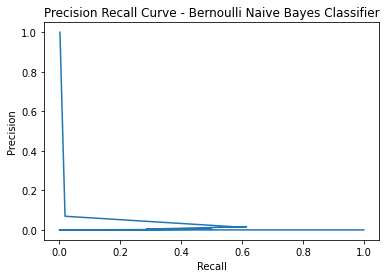

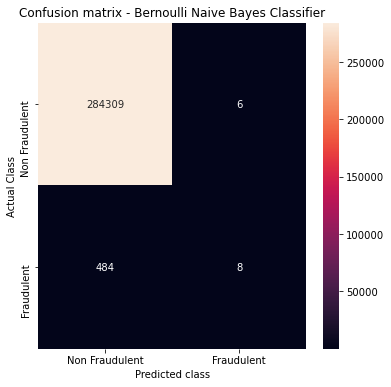

In [150]:
print("Bernoulli Naive Bayes Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_bernoulliNBPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_bernoulliNBPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_bernoulliNBPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_bernoulliNBPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_bernoulliNBPredictions))
print(classification_report(y_original.flatten(), original_bernoulliNBPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_bernoulliNBPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Bernoulli Naive Bayes Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_bernoulliNBPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Bernoulli Naive Bayes Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Decision Tree Classifier
Accuracy:  0.431341224056993
Precision:  0.002820509662401005
Recall:  0.9308943089430894
F1-Score:  0.005623979272320934
AUC score:  0.6806855344374276
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.43      0.60    284315
    Fraudulent       0.00      0.93      0.01       492

      accuracy                           0.43    284807
     macro avg       0.50      0.68      0.30    284807
  weighted avg       1.00      0.43      0.60    284807



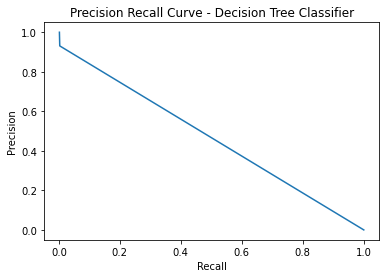

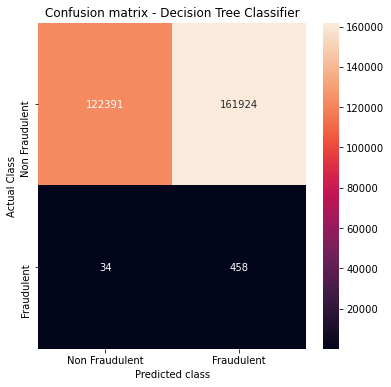

In [151]:
print("Decision Tree Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_decisionTreePredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_decisionTreePredictions))
print("Recall: ",recall_score(y_original.flatten(), original_decisionTreePredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_decisionTreePredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_decisionTreePredictions))
print(classification_report(y_original.flatten(), original_decisionTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_decisionTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_decisionTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Gradient Boosting Classifier
Accuracy:  0.2844838785563557
Precision:  0.002350038188120557
Recall:  0.975609756097561
F1-Score:  0.00468878208885242
AUC score:  0.6294488293000335
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.28      0.44    284315
    Fraudulent       0.00      0.98      0.00       492

      accuracy                           0.28    284807
     macro avg       0.50      0.63      0.22    284807
  weighted avg       1.00      0.28      0.44    284807



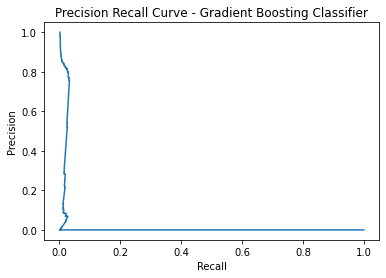

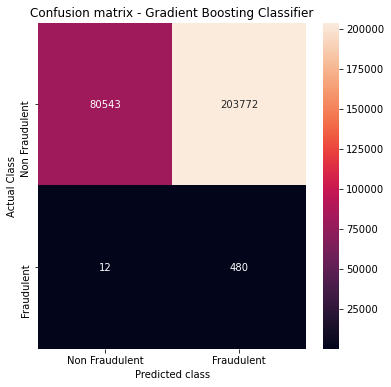

In [152]:
print("Gradient Boosting Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_gradientBoostingPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_gradientBoostingPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_gradientBoostingPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_gradientBoostingPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_gradientBoostingPredictions))
print(classification_report(y_original.flatten(), original_gradientBoostingPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_gradientBoostingPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosting Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_gradientBoostingPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boosting Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Ada Boost Classifier
Accuracy:  0.4735733321161348
Precision:  0.0031783182839740945
Recall:  0.9715447154471545
F1-Score:  0.006335909229484511
AUC score:  0.7221281602665315
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.47      0.64    284315
    Fraudulent       0.00      0.97      0.01       492

      accuracy                           0.47    284807
     macro avg       0.50      0.72      0.32    284807
  weighted avg       1.00      0.47      0.64    284807



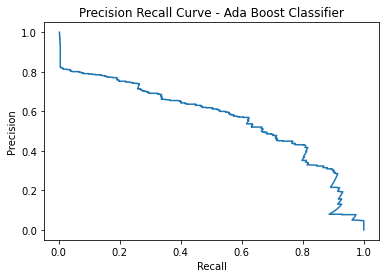

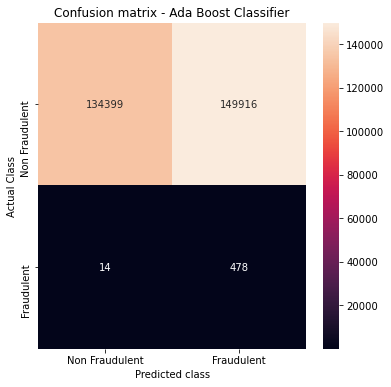

In [153]:
print("Ada Boost Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_adaBoostPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_adaBoostPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_adaBoostPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_adaBoostPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_adaBoostPredictions))
print(classification_report(y_original.flatten(), original_adaBoostPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_adaBoostPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Ada Boost Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_adaBoostPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Ada Boost Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

Support Vector Machine Classifier
Accuracy:  0.004736540885582166
Precision:  0.0017326994189117801
Recall:  1.0
F1-Score:  0.003459404729259392
AUC score:  0.5015071311749293
                precision    recall  f1-score   support

Non Fraudulent       1.00      0.00      0.01    284315
    Fraudulent       0.00      1.00      0.00       492

      accuracy                           0.00    284807
     macro avg       0.50      0.50      0.00    284807
  weighted avg       1.00      0.00      0.01    284807



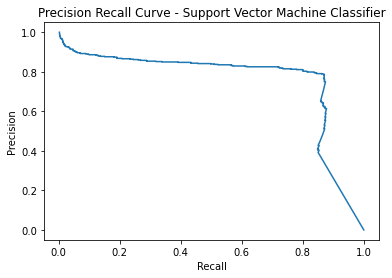

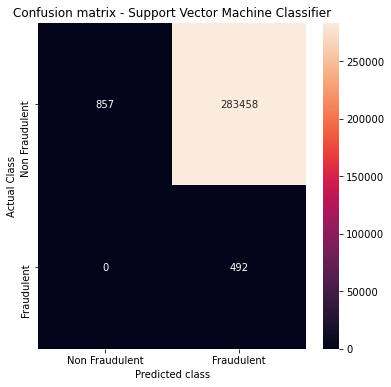

In [154]:
print("Support Vector Machine Classifier")
print("=================================")
print("Accuracy: ",accuracy_score(y_original.flatten(), original_svmPredictions)) 
print("Precision: ",precision_score(y_original.flatten(), original_svmPredictions))
print("Recall: ",recall_score(y_original.flatten(), original_svmPredictions))
print("F1-Score: ",f1_score(y_original.flatten(), original_svmPredictions))
print("AUC score: ",roc_auc_score(y_original.flatten(), original_svmPredictions))
print(classification_report(y_original.flatten(), original_svmPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_original.flatten(), original_svmPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Support Vector Machine Classifier')

confusionMatrix = confusion_matrix(y_original.flatten(), original_svmPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Support Vector Machine Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show() 

# Save the Model

In [ ]:
# filename = 'DecisionTreeClassifierModel.sav'
# joblib.dump(hypertunedDecisionTreeModel, filename)